In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings

#pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('./Data/dengue_features_train.csv')
df_label = pd.read_csv('./Data/dengue_labels_train.csv')
data = pd.merge(df, df_label, on = ['city','year','weekofyear'], how = 'left')

In [3]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [4]:
sj_data = data[data['city'] == 'sj']

In [5]:
sj_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 0 to 935
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   936 non-null    object 
 1   year                                   936 non-null    int64  
 2   weekofyear                             936 non-null    int64  
 3   week_start_date                        936 non-null    object 
 4   ndvi_ne                                745 non-null    float64
 5   ndvi_nw                                887 non-null    float64
 6   ndvi_se                                917 non-null    float64
 7   ndvi_sw                                917 non-null    float64
 8   precipitation_amt_mm                   927 non-null    float64
 9   reanalysis_air_temp_k                  930 non-null    float64
 10  reanalysis_avg_temp_k                  930 non-null    float64
 11  reanalysis_

In [6]:
# Step 1: fillna with most recent value , should use for different cities (2 seperate tables)
def fill_na(df):
    for feature in df.keys():
        df[feature].fillna(method='ffill', inplace=True)
    return df

# Step 2 : fix wrong values
def wrong_week_num(df):
    df.loc[df["weekofyear"] == 53, "weekofyear"] = 1
    return df

In [7]:
def process_data(df):
    df_new = df.copy()
    df_new = fill_na(df_new)
    df_new = wrong_week_num(df_new)
    return df_new

In [8]:
sj_data = process_data(sj_data)

In [9]:
sj_data['avg_reanalysis'] = sj_data[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)
sj_data['avg_ndvi'] = sj_data[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [10]:
sj_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,avg_reanalysis,avg_ndvi
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,296.686000,0.150606
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,297.581143,0.157479
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,298.178857,0.133315
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,298.385143,0.209286
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,298.880857,0.239235


In [11]:
sj_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases',
       'avg_reanalysis', 'avg_ndvi'],
      dtype='object')

In [12]:
sj_data = sj_data[['week_start_date','total_cases', 'avg_ndvi',
                   'reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                'avg_reanalysis',
                 'station_avg_temp_c', 
                 'station_min_temp_c']]

In [13]:
sj_data.head()

,week_start_date,total_cases,avg_ndvi,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,avg_reanalysis,station_avg_temp_c,station_min_temp_c
0,1990-04-30,4,0.150606,14.012857,292.414286,296.686000,25.442857,20.0
1,1990-05-07,5,0.157479,15.372857,293.951429,297.581143,26.714286,22.2
2,1990-05-14,4,0.133315,16.848571,295.434286,298.178857,26.714286,22.8
3,1990-05-21,3,0.209286,16.672857,295.310000,298.385143,27.471429,23.3
4,1990-05-28,6,0.239235,17.210000,295.821429,298.880857,28.942857,23.9


In [14]:
from prophet import Prophet

In [15]:
sj_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   week_start_date                        936 non-null    object 
 1   total_cases                            936 non-null    int64  
 2   avg_ndvi                               936 non-null    float64
 3   reanalysis_specific_humidity_g_per_kg  936 non-null    float64
 4   reanalysis_dew_point_temp_k            936 non-null    float64
 5   avg_reanalysis                         936 non-null    float64
 6   station_avg_temp_c                     936 non-null    float64
 7   station_min_temp_c                     936 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 65.8+ KB


In [16]:
sj_data.rename(columns = {'week_start_date':'ds','total_cases':'y'}, inplace=True)

In [17]:
test_df_main = pd.read_csv('./Data/dengue_features_test.csv')
sj_test_df = test_df_main[test_df_main['city']=='sj']
sj_test_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [18]:
sj_test_df = process_data(sj_test_df)

In [19]:
sj_test_df['avg_reanalysis'] = sj_test_df[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

sj_test_df['avg_ndvi'] = sj_test_df[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [20]:
sj_test_df = sj_test_df[['week_start_date', 'avg_ndvi',
                   'reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                'avg_reanalysis',
                 'station_avg_temp_c', 
                 'station_min_temp_c']]

In [21]:
sj_test_df.rename(columns = {'week_start_date':'ds'}, inplace=True)
sj_test_df.head()


,ds,avg_ndvi,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,avg_reanalysis,station_avg_temp_c,station_min_temp_c
0,2008-04-29,0.039032,15.918571,294.527143,297.814000,26.528571,21.7
1,2008-05-06,0.030989,15.791429,294.395714,297.785714,26.071429,22.2
2,2008-05-13,0.057178,16.674286,295.308571,298.544286,27.928571,22.8
3,2008-05-20,0.057162,15.775714,294.402857,298.744286,28.057143,24.4
4,2008-05-27,0.058704,16.137143,294.760000,298.762286,27.614286,23.3


In [22]:
# Set up parameter grid
import itertools
from prophet import Prophet
from prophet.diagnostics import cross_validation,performance_metrics

# Set up parameter grid
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.08, 0.5],
    'seasonality_prior_scale': [0.01, 1, 5, 12],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# Create a list to store MAPE values for each combination
mapes = [] 
# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet(**params)
    m.add_regressor('avg_reanalysis')
    m.add_regressor('reanalysis_dew_point_temp_k')
    m.add_regressor('station_avg_temp_c')
    m.add_regressor('avg_ndvi')
    m.add_regressor('reanalysis_specific_humidity_g_per_kg')
    m.fit(sj_data)
    # Cross-validation
    df_cv = cross_validation(m, initial='365.25 days', period='30 days', horizon = '30 days', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mae'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = mapes
# Find the best parameters
best_params = all_params[np.argmin(mapes)]
# Fit the model using the best parameters
auto_model_sj = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'], 
                     seasonality_prior_scale=best_params['seasonality_prior_scale'], 
                     seasonality_mode=best_params['seasonality_mode'])
# Fit the model on the training dataset
auto_model_sj.add_regressor('avg_reanalysis')
auto_model_sj.add_regressor('reanalysis_dew_point_temp_k')
auto_model_sj.add_regressor('station_avg_temp_c')
auto_model_sj.add_regressor('avg_ndvi')
auto_model_sj.add_regressor('reanalysis_specific_humidity_g_per_kg')
auto_model_sj.fit(sj_data)

02:53:26 - cmdstanpy - INFO - Chain [1] start processing
02:53:26 - cmdstanpy - INFO - Chain [1] done processing
02:53:30 - cmdstanpy - INFO - Chain [1] start processing
02:53:30 - cmdstanpy - INFO - Chain [1] start processing
02:53:30 - cmdstanpy - INFO - Chain [1] start processing
02:53:30 - cmdstanpy - INFO - Chain [1] start processing
02:53:31 - cmdstanpy - INFO - Chain [1] done processing
02:53:31 - cmdstanpy - INFO - Chain [1] done processing
02:53:31 - cmdstanpy - INFO - Chain [1] done processing
02:53:31 - cmdstanpy - INFO - Chain [1] start processing
02:53:31 - cmdstanpy - INFO - Chain [1] start processing
02:53:31 - cmdstanpy - INFO - Chain [1] start processing
02:53:32 - cmdstanpy - INFO - Chain [1] done processing
02:53:32 - cmdstanpy - INFO - Chain [1] done processing
02:53:32 - cmdstanpy - INFO - Chain [1] start processing
02:53:32 - cmdstanpy - INFO - Chain [1] done processing
02:53:32 - cmdstanpy - INFO - Chain [1] start processing
02:53:32 - cmdstanpy - INFO - Chain [1

02:53:40 - cmdstanpy - INFO - Chain [1] done processing
02:53:40 - cmdstanpy - INFO - Chain [1] done processing
02:53:41 - cmdstanpy - INFO - Chain [1] start processing
02:53:41 - cmdstanpy - INFO - Chain [1] done processing
02:53:41 - cmdstanpy - INFO - Chain [1] start processing
02:53:41 - cmdstanpy - INFO - Chain [1] done processing
02:53:41 - cmdstanpy - INFO - Chain [1] start processing
02:53:41 - cmdstanpy - INFO - Chain [1] done processing
02:53:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:53:41 - cmdstanpy - INFO - Chain [1] start processing
02:53:41 - cmdstanpy - INFO - Chain [1] done processing
02:53:41 - cmdstanpy - INFO - Chain [1] start processing
02:53:41 - cmdstanpy - INFO - Chain [1] done processing
02:53:41 - cmdstanpy - INFO - Chain [1] start processing
02:53:41 - cmdstanpy - INFO - Chain [1] done processing
02:53:41 - cmdstanpy - ERROR - Chain [1] error: error 

02:53:51 - cmdstanpy - INFO - Chain [1] done processing
02:53:51 - cmdstanpy - INFO - Chain [1] start processing
02:53:51 - cmdstanpy - INFO - Chain [1] done processing
02:53:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:53:51 - cmdstanpy - INFO - Chain [1] start processing
02:53:51 - cmdstanpy - INFO - Chain [1] done processing
02:53:52 - cmdstanpy - INFO - Chain [1] start processing
02:53:52 - cmdstanpy - INFO - Chain [1] done processing
02:53:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:53:52 - cmdstanpy - INFO - Chain [1] start processing
02:53:52 - cmdstanpy - INFO - Chain [1] done processing
02:53:52 - cmdstanpy - INFO - Chain [1] done processing
02:53:52 - cmdstanpy - INFO - Chain [1] start processing
02:53:52 - cmdstanpy - INFO - Chain [1] done processing
02:53:52 - 

02:54:01 - cmdstanpy - INFO - Chain [1] start processing
02:54:01 - cmdstanpy - INFO - Chain [1] done processing
02:54:01 - cmdstanpy - INFO - Chain [1] start processing
02:54:02 - cmdstanpy - INFO - Chain [1] done processing
02:54:02 - cmdstanpy - INFO - Chain [1] start processing
02:54:02 - cmdstanpy - INFO - Chain [1] done processing
02:54:02 - cmdstanpy - INFO - Chain [1] start processing
02:54:02 - cmdstanpy - INFO - Chain [1] done processing
02:54:02 - cmdstanpy - INFO - Chain [1] start processing
02:54:03 - cmdstanpy - INFO - Chain [1] done processing
02:54:03 - cmdstanpy - INFO - Chain [1] done processing
02:54:03 - cmdstanpy - INFO - Chain [1] start processing
02:54:03 - cmdstanpy - INFO - Chain [1] done processing
02:54:03 - cmdstanpy - INFO - Chain [1] done processing
02:54:03 - cmdstanpy - INFO - Chain [1] start processing
02:54:03 - cmdstanpy - INFO - Chain [1] done processing
02:54:03 - cmdstanpy - INFO - Chain [1] start processing
02:54:03 - cmdstanpy - INFO - Chain [1] 

02:54:11 - cmdstanpy - INFO - Chain [1] start processing
02:54:11 - cmdstanpy - INFO - Chain [1] start processing
02:54:11 - cmdstanpy - INFO - Chain [1] start processing
02:54:11 - cmdstanpy - INFO - Chain [1] done processing
02:54:11 - cmdstanpy - INFO - Chain [1] start processing
02:54:11 - cmdstanpy - INFO - Chain [1] done processing
02:54:11 - cmdstanpy - INFO - Chain [1] done processing
02:54:11 - cmdstanpy - INFO - Chain [1] done processing
02:54:11 - cmdstanpy - INFO - Chain [1] start processing
02:54:11 - cmdstanpy - INFO - Chain [1] done processing
02:54:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:54:11 - cmdstanpy - INFO - Chain [1] start processing
02:54:11 - cmdstanpy - INFO - Chain [1] start processing
02:54:11 - cmdstanpy - INFO - Chain [1] start processing
02:54:12 - cmdstanpy - INFO - Chain [1] start processing
02:54:12 - cmdstanpy - INFO - Chain [1] done proces

02:54:25 - cmdstanpy - INFO - Chain [1] start processing
02:54:25 - cmdstanpy - INFO - Chain [1] done processing
02:54:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:54:25 - cmdstanpy - INFO - Chain [1] start processing
02:54:25 - cmdstanpy - INFO - Chain [1] done processing
02:54:26 - cmdstanpy - INFO - Chain [1] start processing
02:54:26 - cmdstanpy - INFO - Chain [1] done processing
02:54:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:54:26 - cmdstanpy - INFO - Chain [1] start processing
02:54:26 - cmdstanpy - INFO - Chain [1] done processing
02:54:26 - cmdstanpy - INFO - Chain [1] done processing
02:54:26 - cmdstanpy - INFO - Chain [1] start processing
02:54:26 - cmdstanpy - INFO - Chain [1] done processing
02:54:26 - cmdstanpy - ERROR - Chain [1] error: error during proces

02:54:33 - cmdstanpy - INFO - Chain [1] done processing
02:54:33 - cmdstanpy - INFO - Chain [1] done processing
02:54:33 - cmdstanpy - INFO - Chain [1] start processing
02:54:33 - cmdstanpy - INFO - Chain [1] done processing
02:54:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:54:33 - cmdstanpy - INFO - Chain [1] start processing
02:54:33 - cmdstanpy - INFO - Chain [1] start processing
02:54:33 - cmdstanpy - INFO - Chain [1] done processing
02:54:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:54:33 - cmdstanpy - INFO - Chain [1] start processing
02:54:33 - cmdstanpy - INFO - Chain [1] done processing
02:54:34 - cmdstanpy - INFO - Chain [1] start processing
02:54:34 - cmdstanpy - INFO - Chain [1] done processing
02:54:34 - cmdstanpy - ERROR - Chain [1] error: error during proces

02:54:46 - cmdstanpy - INFO - Chain [1] start processing
02:54:46 - cmdstanpy - INFO - Chain [1] done processing
02:54:46 - cmdstanpy - INFO - Chain [1] done processing
02:54:47 - cmdstanpy - INFO - Chain [1] start processing
02:54:47 - cmdstanpy - INFO - Chain [1] start processing
02:54:47 - cmdstanpy - INFO - Chain [1] done processing
02:54:47 - cmdstanpy - INFO - Chain [1] done processing
02:54:47 - cmdstanpy - INFO - Chain [1] start processing
02:54:47 - cmdstanpy - INFO - Chain [1] start processing
02:54:47 - cmdstanpy - INFO - Chain [1] done processing
02:54:47 - cmdstanpy - INFO - Chain [1] done processing
02:54:47 - cmdstanpy - INFO - Chain [1] start processing
02:54:47 - cmdstanpy - INFO - Chain [1] done processing
02:54:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:54:47 - cmdstanpy - INFO - Chain [1] start processing
02:54:47 - cmdstanpy - INFO - Chain [1] start process

02:54:57 - cmdstanpy - INFO - Chain [1] start processing
02:54:58 - cmdstanpy - INFO - Chain [1] start processing
02:54:58 - cmdstanpy - INFO - Chain [1] done processing
02:54:58 - cmdstanpy - INFO - Chain [1] start processing
02:54:58 - cmdstanpy - INFO - Chain [1] start processing
02:54:58 - cmdstanpy - INFO - Chain [1] done processing
02:54:58 - cmdstanpy - INFO - Chain [1] done processing
02:54:58 - cmdstanpy - INFO - Chain [1] done processing
02:54:58 - cmdstanpy - INFO - Chain [1] start processing
02:54:58 - cmdstanpy - INFO - Chain [1] done processing
02:54:58 - cmdstanpy - INFO - Chain [1] start processing
02:54:58 - cmdstanpy - INFO - Chain [1] start processing
02:54:58 - cmdstanpy - INFO - Chain [1] start processing
02:54:58 - cmdstanpy - INFO - Chain [1] done processing
02:54:58 - cmdstanpy - INFO - Chain [1] done processing
02:54:58 - cmdstanpy - INFO - Chain [1] done processing
02:54:58 - cmdstanpy - INFO - Chain [1] start processing
02:54:58 - cmdstanpy - INFO - Chain [1]

02:55:06 - cmdstanpy - INFO - Chain [1] start processing
02:55:06 - cmdstanpy - INFO - Chain [1] start processing
02:55:07 - cmdstanpy - INFO - Chain [1] start processing
02:55:07 - cmdstanpy - INFO - Chain [1] done processing
02:55:07 - cmdstanpy - INFO - Chain [1] done processing
02:55:07 - cmdstanpy - INFO - Chain [1] done processing
02:55:07 - cmdstanpy - INFO - Chain [1] done processing
02:55:07 - cmdstanpy - INFO - Chain [1] start processing
02:55:07 - cmdstanpy - INFO - Chain [1] start processing
02:55:07 - cmdstanpy - INFO - Chain [1] start processing
02:55:07 - cmdstanpy - INFO - Chain [1] start processing
02:55:07 - cmdstanpy - INFO - Chain [1] done processing
02:55:07 - cmdstanpy - INFO - Chain [1] done processing
02:55:07 - cmdstanpy - INFO - Chain [1] done processing
02:55:07 - cmdstanpy - INFO - Chain [1] done processing
02:55:07 - cmdstanpy - INFO - Chain [1] start processing
02:55:07 - cmdstanpy - INFO - Chain [1] start processing
02:55:07 - cmdstanpy - INFO - Chain [1]

02:55:19 - cmdstanpy - INFO - Chain [1] start processing
02:55:20 - cmdstanpy - INFO - Chain [1] done processing
02:55:20 - cmdstanpy - INFO - Chain [1] start processing
02:55:20 - cmdstanpy - INFO - Chain [1] done processing
02:55:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:55:20 - cmdstanpy - INFO - Chain [1] start processing
02:55:20 - cmdstanpy - INFO - Chain [1] done processing
02:55:20 - cmdstanpy - INFO - Chain [1] done processing
02:55:20 - cmdstanpy - INFO - Chain [1] done processing
02:55:20 - cmdstanpy - INFO - Chain [1] start processing
02:55:20 - cmdstanpy - INFO - Chain [1] done processing
02:55:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:55:20 - cmdstanpy - INFO - Chain [1] start processing
02:55:20 - cmdstanpy - INFO - Chain [1] start processing
02:55:20 -

02:55:28 - cmdstanpy - INFO - Chain [1] start processing
02:55:28 - cmdstanpy - INFO - Chain [1] done processing
02:55:28 - cmdstanpy - INFO - Chain [1] done processing
02:55:28 - cmdstanpy - INFO - Chain [1] start processing
02:55:28 - cmdstanpy - INFO - Chain [1] done processing
02:55:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:55:28 - cmdstanpy - INFO - Chain [1] start processing
02:55:28 - cmdstanpy - INFO - Chain [1] start processing
02:55:29 - cmdstanpy - INFO - Chain [1] done processing
02:55:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:55:29 - cmdstanpy - INFO - Chain [1] start processing
02:55:29 - cmdstanpy - INFO - Chain [1] done processing
02:55:29 - cmdstanpy - INFO - Chain [1] start processing
02:55:29 - cmdstanpy - INFO - Chain [1] done processing
02:55:29 -

02:55:37 - cmdstanpy - INFO - Chain [1] start processing
02:55:37 - cmdstanpy - INFO - Chain [1] done processing
02:55:38 - cmdstanpy - INFO - Chain [1] start processing
02:55:38 - cmdstanpy - INFO - Chain [1] done processing
02:55:38 - cmdstanpy - INFO - Chain [1] start processing
02:55:38 - cmdstanpy - INFO - Chain [1] done processing
02:55:39 - cmdstanpy - INFO - Chain [1] start processing
02:55:39 - cmdstanpy - INFO - Chain [1] done processing
02:55:39 - cmdstanpy - INFO - Chain [1] done processing
02:55:39 - cmdstanpy - INFO - Chain [1] start processing
02:55:39 - cmdstanpy - INFO - Chain [1] done processing
02:55:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:55:39 - cmdstanpy - INFO - Chain [1] start processing
02:55:39 - cmdstanpy - INFO - Chain [1] start processing
02:55:39 - cmdstanpy - INFO - Chain [1] done processing
02:55:39 - cmdstanpy - ERROR - Chain [1] error: error

02:55:47 - cmdstanpy - INFO - Chain [1] start processing
02:55:47 - cmdstanpy - INFO - Chain [1] start processing
02:55:47 - cmdstanpy - INFO - Chain [1] start processing
02:55:48 - cmdstanpy - INFO - Chain [1] start processing
02:55:48 - cmdstanpy - INFO - Chain [1] done processing
02:55:48 - cmdstanpy - INFO - Chain [1] done processing
02:55:48 - cmdstanpy - INFO - Chain [1] done processing
02:55:48 - cmdstanpy - INFO - Chain [1] done processing
02:55:48 - cmdstanpy - INFO - Chain [1] start processing
02:55:48 - cmdstanpy - INFO - Chain [1] start processing
02:55:48 - cmdstanpy - INFO - Chain [1] start processing
02:55:48 - cmdstanpy - INFO - Chain [1] start processing
02:55:48 - cmdstanpy - INFO - Chain [1] done processing
02:55:48 - cmdstanpy - INFO - Chain [1] done processing
02:55:48 - cmdstanpy - INFO - Chain [1] done processing
02:55:48 - cmdstanpy - INFO - Chain [1] done processing
02:55:48 - cmdstanpy - INFO - Chain [1] start processing
02:55:48 - cmdstanpy - INFO - Chain [1]

02:56:04 - cmdstanpy - INFO - Chain [1] start processing
02:56:04 - cmdstanpy - INFO - Chain [1] done processing
02:56:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:56:04 - cmdstanpy - INFO - Chain [1] start processing
02:56:04 - cmdstanpy - INFO - Chain [1] start processing
02:56:04 - cmdstanpy - INFO - Chain [1] done processing
02:56:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:56:04 - cmdstanpy - INFO - Chain [1] start processing
02:56:05 - cmdstanpy - INFO - Chain [1] done processing
02:56:05 - cmdstanpy - INFO - Chain [1] done processing
02:56:05 - cmdstanpy - INFO - Chain [1] done processing
02:56:05 - cmdstanpy - INFO - Chain [1] start processing
02:56:05 - cmdstanpy - INFO - Chain [1] start processing
02:56:05 - cmdstanpy - INFO - Chain [1] done processing
02:56:05 -

02:56:12 - cmdstanpy - INFO - Chain [1] done processing
02:56:13 - cmdstanpy - INFO - Chain [1] start processing
02:56:13 - cmdstanpy - INFO - Chain [1] done processing
02:56:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:56:13 - cmdstanpy - INFO - Chain [1] start processing
02:56:13 - cmdstanpy - INFO - Chain [1] done processing
02:56:13 - cmdstanpy - INFO - Chain [1] done processing
02:56:13 - cmdstanpy - INFO - Chain [1] start processing
02:56:13 - cmdstanpy - INFO - Chain [1] done processing
02:56:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:56:13 - cmdstanpy - INFO - Chain [1] start processing
02:56:13 - cmdstanpy - INFO - Chain [1] done processing
02:56:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abno

02:56:38 - cmdstanpy - INFO - Chain [1] done processing
02:56:38 - cmdstanpy - INFO - Chain [1] done processing
02:56:38 - cmdstanpy - INFO - Chain [1] start processing
02:56:38 - cmdstanpy - INFO - Chain [1] done processing
02:56:38 - cmdstanpy - INFO - Chain [1] start processing
02:56:38 - cmdstanpy - INFO - Chain [1] done processing
02:56:38 - cmdstanpy - INFO - Chain [1] start processing
02:56:38 - cmdstanpy - INFO - Chain [1] done processing
02:56:38 - cmdstanpy - INFO - Chain [1] start processing
02:56:38 - cmdstanpy - INFO - Chain [1] done processing
02:56:39 - cmdstanpy - INFO - Chain [1] start processing
02:56:39 - cmdstanpy - INFO - Chain [1] done processing
02:56:39 - cmdstanpy - INFO - Chain [1] start processing
02:56:39 - cmdstanpy - INFO - Chain [1] done processing
02:56:39 - cmdstanpy - INFO - Chain [1] done processing
02:56:39 - cmdstanpy - INFO - Chain [1] start processing
02:56:39 - cmdstanpy - INFO - Chain [1] start processing
02:56:39 - cmdstanpy - INFO - Chain [1] 

02:56:49 - cmdstanpy - INFO - Chain [1] start processing
02:56:50 - cmdstanpy - INFO - Chain [1] start processing
02:56:50 - cmdstanpy - INFO - Chain [1] start processing
02:56:50 - cmdstanpy - INFO - Chain [1] start processing
02:56:50 - cmdstanpy - INFO - Chain [1] done processing
02:56:50 - cmdstanpy - INFO - Chain [1] done processing
02:56:50 - cmdstanpy - INFO - Chain [1] done processing
02:56:50 - cmdstanpy - INFO - Chain [1] done processing
02:56:50 - cmdstanpy - INFO - Chain [1] start processing
02:56:50 - cmdstanpy - INFO - Chain [1] start processing
02:56:50 - cmdstanpy - INFO - Chain [1] start processing
02:56:50 - cmdstanpy - INFO - Chain [1] start processing
02:56:50 - cmdstanpy - INFO - Chain [1] done processing
02:56:50 - cmdstanpy - INFO - Chain [1] done processing
02:56:50 - cmdstanpy - INFO - Chain [1] done processing
02:56:50 - cmdstanpy - INFO - Chain [1] done processing
02:56:50 - cmdstanpy - INFO - Chain [1] start processing
02:56:50 - cmdstanpy - INFO - Chain [1]

02:56:58 - cmdstanpy - INFO - Chain [1] start processing
02:56:58 - cmdstanpy - INFO - Chain [1] start processing
02:56:58 - cmdstanpy - INFO - Chain [1] start processing
02:56:59 - cmdstanpy - INFO - Chain [1] done processing
02:56:59 - cmdstanpy - INFO - Chain [1] done processing
02:56:59 - cmdstanpy - INFO - Chain [1] done processing
02:56:59 - cmdstanpy - INFO - Chain [1] start processing
02:56:59 - cmdstanpy - INFO - Chain [1] start processing
02:56:59 - cmdstanpy - INFO - Chain [1] start processing
02:56:59 - cmdstanpy - INFO - Chain [1] done processing
02:56:59 - cmdstanpy - INFO - Chain [1] done processing
02:56:59 - cmdstanpy - INFO - Chain [1] done processing
02:56:59 - cmdstanpy - INFO - Chain [1] start processing
02:56:59 - cmdstanpy - INFO - Chain [1] start processing
02:56:59 - cmdstanpy - INFO - Chain [1] start processing
02:56:59 - cmdstanpy - INFO - Chain [1] done processing
02:56:59 - cmdstanpy - INFO - Chain [1] done processing
02:56:59 - cmdstanpy - INFO - Chain [1]

02:57:15 - cmdstanpy - INFO - Chain [1] done processing
02:57:16 - cmdstanpy - INFO - Chain [1] start processing
02:57:16 - cmdstanpy - INFO - Chain [1] done processing
02:57:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:57:16 - cmdstanpy - INFO - Chain [1] start processing
02:57:17 - cmdstanpy - INFO - Chain [1] done processing
02:57:17 - cmdstanpy - INFO - Chain [1] start processing
02:57:17 - cmdstanpy - INFO - Chain [1] done processing
02:57:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:57:17 - cmdstanpy - INFO - Chain [1] start processing
02:57:17 - cmdstanpy - INFO - Chain [1] done processing
02:57:17 - cmdstanpy - INFO - Chain [1] start processing
02:57:17 - cmdstanpy - INFO - Chain [1] done processing
02:57:17 - cmdstanpy - ERROR - Chain [1] error: error during proces

02:57:27 - cmdstanpy - INFO - Chain [1] start processing
02:57:27 - cmdstanpy - INFO - Chain [1] done processing
02:57:27 - cmdstanpy - INFO - Chain [1] start processing
02:57:27 - cmdstanpy - INFO - Chain [1] done processing
02:57:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:57:27 - cmdstanpy - INFO - Chain [1] start processing
02:57:28 - cmdstanpy - INFO - Chain [1] done processing
02:57:28 - cmdstanpy - INFO - Chain [1] done processing
02:57:28 - cmdstanpy - INFO - Chain [1] done processing
02:57:28 - cmdstanpy - INFO - Chain [1] start processing
02:57:28 - cmdstanpy - INFO - Chain [1] start processing
02:57:28 - cmdstanpy - INFO - Chain [1] start processing
02:57:28 - cmdstanpy - INFO - Chain [1] done processing
02:57:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:57:28 -

02:57:35 - cmdstanpy - INFO - Chain [1] start processing
02:57:35 - cmdstanpy - INFO - Chain [1] done processing
02:57:36 - cmdstanpy - INFO - Chain [1] start processing
02:57:36 - cmdstanpy - INFO - Chain [1] done processing
02:57:36 - cmdstanpy - INFO - Chain [1] start processing
02:57:36 - cmdstanpy - INFO - Chain [1] done processing
02:57:36 - cmdstanpy - INFO - Chain [1] start processing
02:57:36 - cmdstanpy - INFO - Chain [1] done processing
02:57:36 - cmdstanpy - INFO - Chain [1] done processing
02:57:37 - cmdstanpy - INFO - Chain [1] start processing
02:57:37 - cmdstanpy - INFO - Chain [1] done processing
02:57:37 - cmdstanpy - INFO - Chain [1] start processing
02:57:37 - cmdstanpy - INFO - Chain [1] done processing
02:57:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:57:37 - cmdstanpy - INFO - Chain [1] start processing
02:57:37 - cmdstanpy - INFO - Chain [1] start process

02:57:45 - cmdstanpy - INFO - Chain [1] start processing
02:57:45 - cmdstanpy - INFO - Chain [1] start processing
02:57:45 - cmdstanpy - INFO - Chain [1] start processing
02:57:45 - cmdstanpy - INFO - Chain [1] start processing
02:57:45 - cmdstanpy - INFO - Chain [1] done processing
02:57:45 - cmdstanpy - INFO - Chain [1] done processing
02:57:45 - cmdstanpy - INFO - Chain [1] done processing
02:57:45 - cmdstanpy - INFO - Chain [1] done processing
02:57:45 - cmdstanpy - INFO - Chain [1] start processing
02:57:45 - cmdstanpy - INFO - Chain [1] start processing
02:57:45 - cmdstanpy - INFO - Chain [1] start processing
02:57:45 - cmdstanpy - INFO - Chain [1] start processing
02:57:45 - cmdstanpy - INFO - Chain [1] done processing
02:57:45 - cmdstanpy - INFO - Chain [1] done processing
02:57:45 - cmdstanpy - INFO - Chain [1] done processing
02:57:45 - cmdstanpy - INFO - Chain [1] done processing
02:57:45 - cmdstanpy - INFO - Chain [1] start processing
02:57:45 - cmdstanpy - INFO - Chain [1]

02:57:59 - cmdstanpy - INFO - Chain [1] done processing
02:57:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:57:59 - cmdstanpy - INFO - Chain [1] start processing
02:58:00 - cmdstanpy - INFO - Chain [1] done processing
02:58:00 - cmdstanpy - INFO - Chain [1] start processing
02:58:00 - cmdstanpy - INFO - Chain [1] done processing
02:58:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:58:00 - cmdstanpy - INFO - Chain [1] start processing
02:58:00 - cmdstanpy - INFO - Chain [1] done processing
02:58:00 - cmdstanpy - INFO - Chain [1] start processing
02:58:00 - cmdstanpy - INFO - Chain [1] done processing
02:58:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:58:00 - cmdstanpy - I

02:58:08 - cmdstanpy - INFO - Chain [1] done processing
02:58:08 - cmdstanpy - INFO - Chain [1] start processing
02:58:08 - cmdstanpy - INFO - Chain [1] done processing
02:58:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:58:08 - cmdstanpy - INFO - Chain [1] start processing
02:58:08 - cmdstanpy - INFO - Chain [1] done processing
02:58:08 - cmdstanpy - INFO - Chain [1] done processing
02:58:08 - cmdstanpy - INFO - Chain [1] done processing
02:58:08 - cmdstanpy - INFO - Chain [1] start processing
02:58:08 - cmdstanpy - INFO - Chain [1] start processing
02:58:08 - cmdstanpy - INFO - Chain [1] done processing
02:58:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:58:08 - cmdstanpy - INFO - Chain [1] done processing
02:58:08 - cmdstanpy - ERROR - Chain [1] error: error during process

02:58:16 - cmdstanpy - INFO - Chain [1] done processing
02:58:17 - cmdstanpy - INFO - Chain [1] start processing
02:58:17 - cmdstanpy - INFO - Chain [1] done processing
02:58:17 - cmdstanpy - INFO - Chain [1] start processing
02:58:17 - cmdstanpy - INFO - Chain [1] done processing
02:58:17 - cmdstanpy - INFO - Chain [1] start processing
02:58:17 - cmdstanpy - INFO - Chain [1] done processing
02:58:17 - cmdstanpy - INFO - Chain [1] start processing
02:58:17 - cmdstanpy - INFO - Chain [1] done processing
02:58:17 - cmdstanpy - INFO - Chain [1] done processing
02:58:18 - cmdstanpy - INFO - Chain [1] start processing
02:58:18 - cmdstanpy - INFO - Chain [1] start processing
02:58:18 - cmdstanpy - INFO - Chain [1] done processing
02:58:18 - cmdstanpy - INFO - Chain [1] done processing
02:58:18 - cmdstanpy - INFO - Chain [1] done processing
02:58:18 - cmdstanpy - INFO - Chain [1] done processing
02:58:18 - cmdstanpy - INFO - Chain [1] start processing
02:58:18 - cmdstanpy - INFO - Chain [1] s

02:58:25 - cmdstanpy - INFO - Chain [1] done processing
02:58:25 - cmdstanpy - INFO - Chain [1] done processing
02:58:25 - cmdstanpy - INFO - Chain [1] start processing
02:58:25 - cmdstanpy - INFO - Chain [1] done processing
02:58:25 - cmdstanpy - INFO - Chain [1] start processing
02:58:25 - cmdstanpy - INFO - Chain [1] done processing
02:58:25 - cmdstanpy - INFO - Chain [1] start processing
02:58:25 - cmdstanpy - INFO - Chain [1] start processing
02:58:25 - cmdstanpy - INFO - Chain [1] done processing
02:58:25 - cmdstanpy - INFO - Chain [1] done processing
02:58:25 - cmdstanpy - INFO - Chain [1] start processing
02:58:25 - cmdstanpy - INFO - Chain [1] done processing
02:58:25 - cmdstanpy - INFO - Chain [1] start processing
02:58:25 - cmdstanpy - INFO - Chain [1] done processing
02:58:25 - cmdstanpy - INFO - Chain [1] start processing
02:58:25 - cmdstanpy - INFO - Chain [1] start processing
02:58:25 - cmdstanpy - INFO - Chain [1] done processing
02:58:25 - cmdstanpy - INFO - Chain [1] 

02:58:32 - cmdstanpy - INFO - Chain [1] start processing
02:58:32 - cmdstanpy - INFO - Chain [1] start processing
02:58:32 - cmdstanpy - INFO - Chain [1] start processing
02:58:32 - cmdstanpy - INFO - Chain [1] done processing
02:58:32 - cmdstanpy - INFO - Chain [1] done processing
02:58:32 - cmdstanpy - INFO - Chain [1] done processing
02:58:32 - cmdstanpy - INFO - Chain [1] start processing
02:58:32 - cmdstanpy - INFO - Chain [1] start processing
02:58:32 - cmdstanpy - INFO - Chain [1] start processing
02:58:32 - cmdstanpy - INFO - Chain [1] done processing
02:58:32 - cmdstanpy - INFO - Chain [1] done processing
02:58:33 - cmdstanpy - INFO - Chain [1] done processing
02:58:33 - cmdstanpy - INFO - Chain [1] start processing
02:58:33 - cmdstanpy - INFO - Chain [1] start processing
02:58:33 - cmdstanpy - INFO - Chain [1] start processing
02:58:33 - cmdstanpy - INFO - Chain [1] done processing
02:58:33 - cmdstanpy - INFO - Chain [1] done processing
02:58:33 - cmdstanpy - INFO - Chain [1]

02:58:47 - cmdstanpy - INFO - Chain [1] done processing
02:58:47 - cmdstanpy - INFO - Chain [1] start processing
02:58:47 - cmdstanpy - INFO - Chain [1] done processing
02:58:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:58:47 - cmdstanpy - INFO - Chain [1] start processing
02:58:47 - cmdstanpy - INFO - Chain [1] done processing
02:58:47 - cmdstanpy - INFO - Chain [1] start processing
02:58:47 - cmdstanpy - INFO - Chain [1] done processing
02:58:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:58:47 - cmdstanpy - INFO - Chain [1] start processing
02:58:48 - cmdstanpy - INFO - Chain [1] done processing
02:58:48 - cmdstanpy - INFO - Chain [1] done processing
02:58:48 - cmdstanpy - INFO - Chain [1] start processing
02:58:48 - cmdstanpy - INFO - Chain [1] done processing
02:58:48 - 

02:58:55 - cmdstanpy - INFO - Chain [1] start processing
02:58:55 - cmdstanpy - INFO - Chain [1] done processing
02:58:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:58:55 - cmdstanpy - INFO - Chain [1] start processing
02:58:56 - cmdstanpy - INFO - Chain [1] done processing
02:58:56 - cmdstanpy - INFO - Chain [1] start processing
02:58:56 - cmdstanpy - INFO - Chain [1] done processing
02:58:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:58:56 - cmdstanpy - INFO - Chain [1] start processing
02:58:56 - cmdstanpy - INFO - Chain [1] done processing
02:58:56 - cmdstanpy - INFO - Chain [1] start processing
02:58:56 - cmdstanpy - INFO - Chain [1] done processing
02:58:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

02:59:03 - cmdstanpy - INFO - Chain [1] start processing
02:59:03 - cmdstanpy - INFO - Chain [1] done processing
02:59:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:59:03 - cmdstanpy - INFO - Chain [1] start processing
02:59:04 - cmdstanpy - INFO - Chain [1] done processing
02:59:04 - cmdstanpy - INFO - Chain [1] start processing
02:59:04 - cmdstanpy - INFO - Chain [1] done processing
02:59:04 - cmdstanpy - INFO - Chain [1] start processing
02:59:04 - cmdstanpy - INFO - Chain [1] done processing
02:59:05 - cmdstanpy - INFO - Chain [1] done processing
02:59:05 - cmdstanpy - INFO - Chain [1] start processing
02:59:05 - cmdstanpy - INFO - Chain [1] done processing
02:59:05 - cmdstanpy - INFO - Chain [1] start processing
02:59:05 - cmdstanpy - INFO - Chain [1] done processing
02:59:05 - cmdstanpy - INFO - Chain [1] done processing
02:59:05 - cmdstanpy - INFO - Chain [1] start processi

02:59:13 - cmdstanpy - INFO - Chain [1] done processing
02:59:13 - cmdstanpy - INFO - Chain [1] done processing
02:59:13 - cmdstanpy - INFO - Chain [1] start processing
02:59:13 - cmdstanpy - INFO - Chain [1] start processing
02:59:13 - cmdstanpy - INFO - Chain [1] done processing
02:59:13 - cmdstanpy - INFO - Chain [1] done processing
02:59:13 - cmdstanpy - INFO - Chain [1] start processing
02:59:13 - cmdstanpy - INFO - Chain [1] start processing
02:59:13 - cmdstanpy - INFO - Chain [1] done processing
02:59:13 - cmdstanpy - INFO - Chain [1] done processing
02:59:13 - cmdstanpy - INFO - Chain [1] start processing
02:59:13 - cmdstanpy - INFO - Chain [1] start processing
02:59:14 - cmdstanpy - INFO - Chain [1] done processing
02:59:14 - cmdstanpy - INFO - Chain [1] done processing
02:59:14 - cmdstanpy - INFO - Chain [1] start processing
02:59:14 - cmdstanpy - INFO - Chain [1] start processing
02:59:14 - cmdstanpy - INFO - Chain [1] done processing
02:59:14 - cmdstanpy - INFO - Chain [1] 

02:59:27 - cmdstanpy - INFO - Chain [1] done processing
02:59:27 - cmdstanpy - INFO - Chain [1] done processing
02:59:27 - cmdstanpy - INFO - Chain [1] start processing
02:59:27 - cmdstanpy - INFO - Chain [1] done processing
02:59:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:59:27 - cmdstanpy - INFO - Chain [1] start processing
02:59:27 - cmdstanpy - INFO - Chain [1] start processing
02:59:27 - cmdstanpy - INFO - Chain [1] done processing
02:59:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:59:27 - cmdstanpy - INFO - Chain [1] start processing
02:59:27 - cmdstanpy - INFO - Chain [1] done processing
02:59:27 - cmdstanpy - INFO - Chain [1] start processing
02:59:27 - cmdstanpy - INFO - Chain [1] done processing
02:59:27 - cmdstanpy - ERROR - Chain [1] error: error during proces

02:59:33 - cmdstanpy - INFO - Chain [1] done processing
02:59:33 - cmdstanpy - INFO - Chain [1] done processing
02:59:33 - cmdstanpy - INFO - Chain [1] start processing
02:59:33 - cmdstanpy - INFO - Chain [1] done processing
02:59:33 - cmdstanpy - INFO - Chain [1] start processing
02:59:33 - cmdstanpy - INFO - Chain [1] done processing
02:59:33 - cmdstanpy - INFO - Chain [1] done processing
02:59:33 - cmdstanpy - INFO - Chain [1] start processing
02:59:33 - cmdstanpy - INFO - Chain [1] start processing
02:59:33 - cmdstanpy - INFO - Chain [1] start processing
02:59:33 - cmdstanpy - INFO - Chain [1] done processing
02:59:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:59:33 - cmdstanpy - INFO - Chain [1] done processing
02:59:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:59:33 - 

02:59:42 - cmdstanpy - INFO - Chain [1] start processing
02:59:42 - cmdstanpy - INFO - Chain [1] done processing
02:59:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:59:42 - cmdstanpy - INFO - Chain [1] done processing
02:59:42 - cmdstanpy - INFO - Chain [1] start processing
02:59:42 - cmdstanpy - INFO - Chain [1] start processing
02:59:42 - cmdstanpy - INFO - Chain [1] done processing
02:59:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:59:42 - cmdstanpy - INFO - Chain [1] start processing
02:59:43 - cmdstanpy - INFO - Chain [1] done processing
02:59:43 - cmdstanpy - INFO - Chain [1] start processing
02:59:43 - cmdstanpy - INFO - Chain [1] done processing
02:59:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

02:59:51 - cmdstanpy - INFO - Chain [1] done processing
02:59:51 - cmdstanpy - INFO - Chain [1] start processing
02:59:51 - cmdstanpy - INFO - Chain [1] start processing
02:59:51 - cmdstanpy - INFO - Chain [1] start processing
02:59:51 - cmdstanpy - INFO - Chain [1] done processing
02:59:51 - cmdstanpy - INFO - Chain [1] done processing
02:59:51 - cmdstanpy - INFO - Chain [1] done processing
02:59:52 - cmdstanpy - INFO - Chain [1] start processing
02:59:52 - cmdstanpy - INFO - Chain [1] done processing
02:59:52 - cmdstanpy - INFO - Chain [1] start processing
02:59:52 - cmdstanpy - INFO - Chain [1] start processing
02:59:52 - cmdstanpy - INFO - Chain [1] start processing
02:59:52 - cmdstanpy - INFO - Chain [1] done processing
02:59:52 - cmdstanpy - INFO - Chain [1] done processing
02:59:52 - cmdstanpy - INFO - Chain [1] done processing
02:59:52 - cmdstanpy - INFO - Chain [1] start processing
02:59:52 - cmdstanpy - INFO - Chain [1] done processing
02:59:52 - cmdstanpy - INFO - Chain [1] 

02:59:58 - cmdstanpy - INFO - Chain [1] start processing
02:59:58 - cmdstanpy - INFO - Chain [1] start processing
02:59:58 - cmdstanpy - INFO - Chain [1] start processing
02:59:58 - cmdstanpy - INFO - Chain [1] done processing
02:59:58 - cmdstanpy - INFO - Chain [1] done processing
02:59:58 - cmdstanpy - INFO - Chain [1] done processing
02:59:59 - cmdstanpy - INFO - Chain [1] start processing
02:59:59 - cmdstanpy - INFO - Chain [1] start processing
02:59:59 - cmdstanpy - INFO - Chain [1] start processing
02:59:59 - cmdstanpy - INFO - Chain [1] done processing
02:59:59 - cmdstanpy - INFO - Chain [1] done processing
02:59:59 - cmdstanpy - INFO - Chain [1] done processing
02:59:59 - cmdstanpy - INFO - Chain [1] start processing
02:59:59 - cmdstanpy - INFO - Chain [1] start processing
02:59:59 - cmdstanpy - INFO - Chain [1] start processing
02:59:59 - cmdstanpy - INFO - Chain [1] done processing
02:59:59 - cmdstanpy - INFO - Chain [1] done processing
02:59:59 - cmdstanpy - INFO - Chain [1]

03:00:11 - cmdstanpy - INFO - Chain [1] done processing
03:00:11 - cmdstanpy - INFO - Chain [1] done processing
03:00:11 - cmdstanpy - INFO - Chain [1] start processing
03:00:11 - cmdstanpy - INFO - Chain [1] done processing
03:00:11 - cmdstanpy - INFO - Chain [1] start processing
03:00:11 - cmdstanpy - INFO - Chain [1] done processing
03:00:11 - cmdstanpy - INFO - Chain [1] start processing
03:00:11 - cmdstanpy - INFO - Chain [1] start processing
03:00:11 - cmdstanpy - INFO - Chain [1] done processing
03:00:11 - cmdstanpy - INFO - Chain [1] done processing
03:00:11 - cmdstanpy - INFO - Chain [1] start processing
03:00:12 - cmdstanpy - INFO - Chain [1] start processing
03:00:12 - cmdstanpy - INFO - Chain [1] done processing
03:00:12 - cmdstanpy - INFO - Chain [1] done processing
03:00:12 - cmdstanpy - INFO - Chain [1] start processing
03:00:12 - cmdstanpy - INFO - Chain [1] start processing
03:00:12 - cmdstanpy - INFO - Chain [1] done processing
03:00:12 - cmdstanpy - INFO - Chain [1] 

03:00:18 - cmdstanpy - INFO - Chain [1] start processing
03:00:18 - cmdstanpy - INFO - Chain [1] start processing
03:00:18 - cmdstanpy - INFO - Chain [1] start processing
03:00:18 - cmdstanpy - INFO - Chain [1] start processing
03:00:18 - cmdstanpy - INFO - Chain [1] done processing
03:00:19 - cmdstanpy - INFO - Chain [1] done processing
03:00:19 - cmdstanpy - INFO - Chain [1] done processing
03:00:19 - cmdstanpy - INFO - Chain [1] done processing
03:00:19 - cmdstanpy - INFO - Chain [1] start processing
03:00:19 - cmdstanpy - INFO - Chain [1] start processing
03:00:19 - cmdstanpy - INFO - Chain [1] start processing
03:00:19 - cmdstanpy - INFO - Chain [1] done processing
03:00:19 - cmdstanpy - INFO - Chain [1] start processing
03:00:19 - cmdstanpy - INFO - Chain [1] done processing
03:00:19 - cmdstanpy - INFO - Chain [1] done processing
03:00:19 - cmdstanpy - INFO - Chain [1] done processing
03:00:19 - cmdstanpy - INFO - Chain [1] start processing
03:00:19 - cmdstanpy - INFO - Chain [1]

03:00:27 - cmdstanpy - INFO - Chain [1] start processing
03:00:27 - cmdstanpy - INFO - Chain [1] start processing
03:00:27 - cmdstanpy - INFO - Chain [1] start processing
03:00:27 - cmdstanpy - INFO - Chain [1] start processing
03:00:27 - cmdstanpy - INFO - Chain [1] done processing
03:00:27 - cmdstanpy - INFO - Chain [1] done processing
03:00:27 - cmdstanpy - INFO - Chain [1] done processing
03:00:27 - cmdstanpy - INFO - Chain [1] done processing
03:00:27 - cmdstanpy - INFO - Chain [1] start processing
03:00:27 - cmdstanpy - INFO - Chain [1] start processing
03:00:27 - cmdstanpy - INFO - Chain [1] start processing
03:00:27 - cmdstanpy - INFO - Chain [1] start processing
03:00:27 - cmdstanpy - INFO - Chain [1] done processing
03:00:27 - cmdstanpy - INFO - Chain [1] done processing
03:00:27 - cmdstanpy - INFO - Chain [1] done processing
03:00:28 - cmdstanpy - INFO - Chain [1] done processing
03:00:28 - cmdstanpy - INFO - Chain [1] start processing
03:00:28 - cmdstanpy - INFO - Chain [1]

03:00:39 - cmdstanpy - INFO - Chain [1] done processing
03:00:39 - cmdstanpy - INFO - Chain [1] done processing
03:00:39 - cmdstanpy - INFO - Chain [1] start processing
03:00:39 - cmdstanpy - INFO - Chain [1] start processing
03:00:39 - cmdstanpy - INFO - Chain [1] done processing
03:00:39 - cmdstanpy - INFO - Chain [1] start processing
03:00:39 - cmdstanpy - INFO - Chain [1] start processing
03:00:39 - cmdstanpy - INFO - Chain [1] done processing
03:00:39 - cmdstanpy - INFO - Chain [1] done processing
03:00:39 - cmdstanpy - INFO - Chain [1] done processing
03:00:39 - cmdstanpy - INFO - Chain [1] start processing
03:00:39 - cmdstanpy - INFO - Chain [1] start processing
03:00:39 - cmdstanpy - INFO - Chain [1] done processing
03:00:39 - cmdstanpy - INFO - Chain [1] start processing
03:00:39 - cmdstanpy - INFO - Chain [1] start processing
03:00:39 - cmdstanpy - INFO - Chain [1] done processing
03:00:40 - cmdstanpy - INFO - Chain [1] done processing
03:00:40 - cmdstanpy - INFO - Chain [1] 

03:00:46 - cmdstanpy - INFO - Chain [1] done processing
03:00:46 - cmdstanpy - INFO - Chain [1] done processing
03:00:46 - cmdstanpy - INFO - Chain [1] start processing
03:00:46 - cmdstanpy - INFO - Chain [1] start processing
03:00:46 - cmdstanpy - INFO - Chain [1] start processing
03:00:46 - cmdstanpy - INFO - Chain [1] start processing
03:00:46 - cmdstanpy - INFO - Chain [1] done processing
03:00:46 - cmdstanpy - INFO - Chain [1] done processing
03:00:46 - cmdstanpy - INFO - Chain [1] done processing
03:00:46 - cmdstanpy - INFO - Chain [1] done processing
03:00:46 - cmdstanpy - INFO - Chain [1] start processing
03:00:46 - cmdstanpy - INFO - Chain [1] start processing
03:00:46 - cmdstanpy - INFO - Chain [1] start processing
03:00:46 - cmdstanpy - INFO - Chain [1] start processing
03:00:47 - cmdstanpy - INFO - Chain [1] done processing
03:00:47 - cmdstanpy - INFO - Chain [1] done processing
03:00:47 - cmdstanpy - INFO - Chain [1] done processing
03:00:47 - cmdstanpy - INFO - Chain [1] 

03:01:01 - cmdstanpy - INFO - Chain [1] start processing
03:01:01 - cmdstanpy - INFO - Chain [1] start processing
03:01:02 - cmdstanpy - INFO - Chain [1] done processing
03:01:02 - cmdstanpy - INFO - Chain [1] done processing
03:01:02 - cmdstanpy - INFO - Chain [1] done processing
03:01:02 - cmdstanpy - INFO - Chain [1] start processing
03:01:02 - cmdstanpy - INFO - Chain [1] start processing
03:01:02 - cmdstanpy - INFO - Chain [1] start processing
03:01:03 - cmdstanpy - INFO - Chain [1] done processing
03:01:03 - cmdstanpy - INFO - Chain [1] start processing
03:01:03 - cmdstanpy - INFO - Chain [1] done processing
03:01:03 - cmdstanpy - INFO - Chain [1] done processing
03:01:04 - cmdstanpy - INFO - Chain [1] start processing
03:01:04 - cmdstanpy - INFO - Chain [1] start processing
03:01:04 - cmdstanpy - INFO - Chain [1] done processing
03:01:04 - cmdstanpy - INFO - Chain [1] done processing
03:01:04 - cmdstanpy - INFO - Chain [1] start processing
03:01:04 - cmdstanpy - INFO - Chain [1]

03:01:10 - cmdstanpy - INFO - Chain [1] start processing
03:01:10 - cmdstanpy - INFO - Chain [1] start processing
03:01:10 - cmdstanpy - INFO - Chain [1] start processing
03:01:10 - cmdstanpy - INFO - Chain [1] start processing
03:01:10 - cmdstanpy - INFO - Chain [1] done processing
03:01:10 - cmdstanpy - INFO - Chain [1] done processing
03:01:10 - cmdstanpy - INFO - Chain [1] done processing
03:01:10 - cmdstanpy - INFO - Chain [1] done processing
03:01:10 - cmdstanpy - INFO - Chain [1] start processing
03:01:10 - cmdstanpy - INFO - Chain [1] start processing
03:01:10 - cmdstanpy - INFO - Chain [1] start processing
03:01:10 - cmdstanpy - INFO - Chain [1] start processing
03:01:10 - cmdstanpy - INFO - Chain [1] done processing
03:01:10 - cmdstanpy - INFO - Chain [1] done processing
03:01:10 - cmdstanpy - INFO - Chain [1] done processing
03:01:10 - cmdstanpy - INFO - Chain [1] done processing
03:01:10 - cmdstanpy - INFO - Chain [1] start processing
03:01:10 - cmdstanpy - INFO - Chain [1]

03:01:17 - cmdstanpy - INFO - Chain [1] done processing
03:01:17 - cmdstanpy - INFO - Chain [1] done processing
03:01:17 - cmdstanpy - INFO - Chain [1] done processing
03:01:17 - cmdstanpy - INFO - Chain [1] start processing
03:01:17 - cmdstanpy - INFO - Chain [1] start processing
03:01:17 - cmdstanpy - INFO - Chain [1] start processing
03:01:17 - cmdstanpy - INFO - Chain [1] start processing
03:01:17 - cmdstanpy - INFO - Chain [1] done processing
03:01:17 - cmdstanpy - INFO - Chain [1] done processing
03:01:17 - cmdstanpy - INFO - Chain [1] done processing
03:01:17 - cmdstanpy - INFO - Chain [1] done processing
03:01:18 - cmdstanpy - INFO - Chain [1] start processing
03:01:18 - cmdstanpy - INFO - Chain [1] start processing
03:01:18 - cmdstanpy - INFO - Chain [1] start processing
03:01:18 - cmdstanpy - INFO - Chain [1] start processing
03:01:18 - cmdstanpy - INFO - Chain [1] done processing
03:01:18 - cmdstanpy - INFO - Chain [1] done processing
03:01:18 - cmdstanpy - INFO - Chain [1] 

03:01:31 - cmdstanpy - INFO - Chain [1] done processing
03:01:31 - cmdstanpy - INFO - Chain [1] start processing
03:01:31 - cmdstanpy - INFO - Chain [1] done processing
03:01:31 - cmdstanpy - INFO - Chain [1] start processing
03:01:32 - cmdstanpy - INFO - Chain [1] start processing
03:01:32 - cmdstanpy - INFO - Chain [1] start processing
03:01:32 - cmdstanpy - INFO - Chain [1] done processing
03:01:32 - cmdstanpy - INFO - Chain [1] done processing
03:01:32 - cmdstanpy - INFO - Chain [1] done processing
03:01:32 - cmdstanpy - INFO - Chain [1] start processing
03:01:32 - cmdstanpy - INFO - Chain [1] start processing
03:01:32 - cmdstanpy - INFO - Chain [1] done processing
03:01:32 - cmdstanpy - INFO - Chain [1] done processing
03:01:32 - cmdstanpy - INFO - Chain [1] start processing
03:01:32 - cmdstanpy - INFO - Chain [1] start processing
03:01:32 - cmdstanpy - INFO - Chain [1] done processing
03:01:32 - cmdstanpy - INFO - Chain [1] done processing
03:01:32 - cmdstanpy - INFO - Chain [1] 

03:01:39 - cmdstanpy - INFO - Chain [1] start processing
03:01:39 - cmdstanpy - INFO - Chain [1] start processing
03:01:39 - cmdstanpy - INFO - Chain [1] done processing
03:01:40 - cmdstanpy - INFO - Chain [1] done processing
03:01:40 - cmdstanpy - INFO - Chain [1] done processing
03:01:40 - cmdstanpy - INFO - Chain [1] done processing
03:01:40 - cmdstanpy - INFO - Chain [1] start processing
03:01:40 - cmdstanpy - INFO - Chain [1] start processing
03:01:40 - cmdstanpy - INFO - Chain [1] start processing
03:01:40 - cmdstanpy - INFO - Chain [1] done processing
03:01:40 - cmdstanpy - INFO - Chain [1] start processing
03:01:40 - cmdstanpy - INFO - Chain [1] done processing
03:01:40 - cmdstanpy - INFO - Chain [1] done processing
03:01:40 - cmdstanpy - INFO - Chain [1] start processing
03:01:40 - cmdstanpy - INFO - Chain [1] done processing
03:01:40 - cmdstanpy - INFO - Chain [1] start processing
03:01:40 - cmdstanpy - INFO - Chain [1] done processing
03:01:40 - cmdstanpy - INFO - Chain [1] 

03:01:50 - cmdstanpy - INFO - Chain [1] start processing
03:01:50 - cmdstanpy - INFO - Chain [1] done processing
03:01:50 - cmdstanpy - INFO - Chain [1] done processing
03:01:50 - cmdstanpy - INFO - Chain [1] done processing
03:01:50 - cmdstanpy - INFO - Chain [1] start processing
03:01:50 - cmdstanpy - INFO - Chain [1] start processing
03:01:50 - cmdstanpy - INFO - Chain [1] done processing
03:01:51 - cmdstanpy - INFO - Chain [1] start processing
03:01:51 - cmdstanpy - INFO - Chain [1] start processing
03:01:51 - cmdstanpy - INFO - Chain [1] done processing
03:01:51 - cmdstanpy - INFO - Chain [1] done processing
03:01:51 - cmdstanpy - INFO - Chain [1] done processing
03:01:51 - cmdstanpy - INFO - Chain [1] done processing
03:01:51 - cmdstanpy - INFO - Chain [1] start processing
03:01:52 - cmdstanpy - INFO - Chain [1] start processing
03:01:52 - cmdstanpy - INFO - Chain [1] start processing
03:01:52 - cmdstanpy - INFO - Chain [1] start processing
03:01:52 - cmdstanpy - INFO - Chain [1]

03:02:08 - cmdstanpy - INFO - Chain [1] done processing
03:02:08 - cmdstanpy - INFO - Chain [1] start processing
03:02:08 - cmdstanpy - INFO - Chain [1] done processing
03:02:08 - cmdstanpy - INFO - Chain [1] done processing
03:02:08 - cmdstanpy - INFO - Chain [1] done processing
03:02:08 - cmdstanpy - INFO - Chain [1] start processing
03:02:08 - cmdstanpy - INFO - Chain [1] start processing
03:02:08 - cmdstanpy - INFO - Chain [1] start processing
03:02:08 - cmdstanpy - INFO - Chain [1] start processing
03:02:08 - cmdstanpy - INFO - Chain [1] done processing
03:02:08 - cmdstanpy - INFO - Chain [1] done processing
03:02:08 - cmdstanpy - INFO - Chain [1] done processing
03:02:08 - cmdstanpy - INFO - Chain [1] done processing
03:02:09 - cmdstanpy - INFO - Chain [1] start processing
03:02:09 - cmdstanpy - INFO - Chain [1] start processing
03:02:09 - cmdstanpy - INFO - Chain [1] start processing
03:02:09 - cmdstanpy - INFO - Chain [1] start processing
03:02:09 - cmdstanpy - INFO - Chain [1]

03:02:15 - cmdstanpy - INFO - Chain [1] start processing
03:02:15 - cmdstanpy - INFO - Chain [1] start processing
03:02:15 - cmdstanpy - INFO - Chain [1] start processing
03:02:15 - cmdstanpy - INFO - Chain [1] start processing
03:02:15 - cmdstanpy - INFO - Chain [1] done processing
03:02:15 - cmdstanpy - INFO - Chain [1] done processing
03:02:15 - cmdstanpy - INFO - Chain [1] done processing
03:02:15 - cmdstanpy - INFO - Chain [1] done processing
03:02:15 - cmdstanpy - INFO - Chain [1] start processing
03:02:15 - cmdstanpy - INFO - Chain [1] start processing
03:02:15 - cmdstanpy - INFO - Chain [1] start processing
03:02:15 - cmdstanpy - INFO - Chain [1] start processing
03:02:15 - cmdstanpy - INFO - Chain [1] done processing
03:02:15 - cmdstanpy - INFO - Chain [1] done processing
03:02:15 - cmdstanpy - INFO - Chain [1] done processing
03:02:15 - cmdstanpy - INFO - Chain [1] done processing
03:02:15 - cmdstanpy - INFO - Chain [1] start processing
03:02:15 - cmdstanpy - INFO - Chain [1]

03:02:22 - cmdstanpy - INFO - Chain [1] start processing
03:02:22 - cmdstanpy - INFO - Chain [1] done processing
03:02:22 - cmdstanpy - INFO - Chain [1] done processing
03:02:22 - cmdstanpy - INFO - Chain [1] done processing
03:02:22 - cmdstanpy - INFO - Chain [1] done processing
03:02:22 - cmdstanpy - INFO - Chain [1] start processing
03:02:23 - cmdstanpy - INFO - Chain [1] start processing
03:02:23 - cmdstanpy - INFO - Chain [1] start processing
03:02:23 - cmdstanpy - INFO - Chain [1] start processing
03:02:23 - cmdstanpy - INFO - Chain [1] done processing
03:02:23 - cmdstanpy - INFO - Chain [1] done processing
03:02:23 - cmdstanpy - INFO - Chain [1] done processing
03:02:23 - cmdstanpy - INFO - Chain [1] start processing
03:02:23 - cmdstanpy - INFO - Chain [1] done processing
03:02:23 - cmdstanpy - INFO - Chain [1] start processing
03:02:23 - cmdstanpy - INFO - Chain [1] start processing
03:02:23 - cmdstanpy - INFO - Chain [1] done processing
03:02:23 - cmdstanpy - INFO - Chain [1] 

03:02:39 - cmdstanpy - INFO - Chain [1] start processing
03:02:39 - cmdstanpy - INFO - Chain [1] done processing
03:02:39 - cmdstanpy - INFO - Chain [1] start processing
03:02:39 - cmdstanpy - INFO - Chain [1] start processing
03:02:39 - cmdstanpy - INFO - Chain [1] start processing
03:02:39 - cmdstanpy - INFO - Chain [1] done processing
03:02:39 - cmdstanpy - INFO - Chain [1] done processing
03:02:39 - cmdstanpy - INFO - Chain [1] done processing
03:02:39 - cmdstanpy - INFO - Chain [1] start processing
03:02:40 - cmdstanpy - INFO - Chain [1] start processing
03:02:40 - cmdstanpy - INFO - Chain [1] start processing
03:02:40 - cmdstanpy - INFO - Chain [1] start processing
03:02:40 - cmdstanpy - INFO - Chain [1] done processing
03:02:40 - cmdstanpy - INFO - Chain [1] done processing
03:02:40 - cmdstanpy - INFO - Chain [1] done processing
03:02:40 - cmdstanpy - INFO - Chain [1] done processing
03:02:40 - cmdstanpy - INFO - Chain [1] start processing
03:02:40 - cmdstanpy - INFO - Chain [1]

03:02:51 - cmdstanpy - INFO - Chain [1] done processing
03:02:51 - cmdstanpy - INFO - Chain [1] done processing
03:02:51 - cmdstanpy - INFO - Chain [1] done processing
03:02:51 - cmdstanpy - INFO - Chain [1] start processing
03:02:52 - cmdstanpy - INFO - Chain [1] start processing
03:02:52 - cmdstanpy - INFO - Chain [1] start processing
03:02:52 - cmdstanpy - INFO - Chain [1] start processing
03:02:52 - cmdstanpy - INFO - Chain [1] done processing
03:02:52 - cmdstanpy - INFO - Chain [1] done processing
03:02:52 - cmdstanpy - INFO - Chain [1] done processing
03:02:52 - cmdstanpy - INFO - Chain [1] done processing
03:02:52 - cmdstanpy - INFO - Chain [1] start processing
03:02:52 - cmdstanpy - INFO - Chain [1] start processing
03:02:52 - cmdstanpy - INFO - Chain [1] start processing
03:02:52 - cmdstanpy - INFO - Chain [1] start processing
03:02:52 - cmdstanpy - INFO - Chain [1] done processing
03:02:53 - cmdstanpy - INFO - Chain [1] done processing
03:02:53 - cmdstanpy - INFO - Chain [1] 

03:03:17 - cmdstanpy - INFO - Chain [1] done processing
03:03:18 - cmdstanpy - INFO - Chain [1] start processing
03:03:18 - cmdstanpy - INFO - Chain [1] done processing
03:03:24 - cmdstanpy - INFO - Chain [1] start processing
03:03:24 - cmdstanpy - INFO - Chain [1] start processing
03:03:24 - cmdstanpy - INFO - Chain [1] start processing
03:03:24 - cmdstanpy - INFO - Chain [1] start processing
03:03:24 - cmdstanpy - INFO - Chain [1] done processing
03:03:25 - cmdstanpy - INFO - Chain [1] start processing
03:03:25 - cmdstanpy - INFO - Chain [1] done processing
03:03:25 - cmdstanpy - INFO - Chain [1] done processing
03:03:25 - cmdstanpy - INFO - Chain [1] start processing
03:03:25 - cmdstanpy - INFO - Chain [1] start processing
03:03:25 - cmdstanpy - INFO - Chain [1] done processing
03:03:26 - cmdstanpy - INFO - Chain [1] start processing
03:03:26 - cmdstanpy - INFO - Chain [1] done processing
03:03:26 - cmdstanpy - INFO - Chain [1] start processing
03:03:27 - cmdstanpy - INFO - Chain [1

03:03:34 - cmdstanpy - INFO - Chain [1] start processing
03:03:34 - cmdstanpy - INFO - Chain [1] start processing
03:03:34 - cmdstanpy - INFO - Chain [1] start processing
03:03:34 - cmdstanpy - INFO - Chain [1] done processing
03:03:34 - cmdstanpy - INFO - Chain [1] start processing
03:03:34 - cmdstanpy - INFO - Chain [1] done processing
03:03:34 - cmdstanpy - INFO - Chain [1] done processing
03:03:34 - cmdstanpy - INFO - Chain [1] done processing
03:03:35 - cmdstanpy - INFO - Chain [1] start processing
03:03:35 - cmdstanpy - INFO - Chain [1] start processing
03:03:35 - cmdstanpy - INFO - Chain [1] start processing
03:03:35 - cmdstanpy - INFO - Chain [1] start processing
03:03:35 - cmdstanpy - INFO - Chain [1] done processing
03:03:35 - cmdstanpy - INFO - Chain [1] done processing
03:03:35 - cmdstanpy - INFO - Chain [1] done processing
03:03:35 - cmdstanpy - INFO - Chain [1] done processing
03:03:35 - cmdstanpy - INFO - Chain [1] start processing
03:03:35 - cmdstanpy - INFO - Chain [1]

03:03:44 - cmdstanpy - INFO - Chain [1] done processing
03:03:44 - cmdstanpy - INFO - Chain [1] done processing
03:03:44 - cmdstanpy - INFO - Chain [1] done processing
03:03:44 - cmdstanpy - INFO - Chain [1] start processing
03:03:44 - cmdstanpy - INFO - Chain [1] done processing
03:03:44 - cmdstanpy - INFO - Chain [1] start processing
03:03:44 - cmdstanpy - INFO - Chain [1] start processing
03:03:44 - cmdstanpy - INFO - Chain [1] start processing
03:03:44 - cmdstanpy - INFO - Chain [1] done processing
03:03:45 - cmdstanpy - INFO - Chain [1] done processing
03:03:45 - cmdstanpy - INFO - Chain [1] done processing
03:03:45 - cmdstanpy - INFO - Chain [1] start processing
03:03:45 - cmdstanpy - INFO - Chain [1] done processing
03:03:45 - cmdstanpy - INFO - Chain [1] start processing
03:03:45 - cmdstanpy - INFO - Chain [1] start processing
03:03:45 - cmdstanpy - INFO - Chain [1] start processing
03:03:45 - cmdstanpy - INFO - Chain [1] done processing
03:03:45 - cmdstanpy - INFO - Chain [1] 

03:04:04 - cmdstanpy - INFO - Chain [1] start processing
03:04:04 - cmdstanpy - INFO - Chain [1] done processing
03:04:05 - cmdstanpy - INFO - Chain [1] start processing
03:04:05 - cmdstanpy - INFO - Chain [1] done processing
03:04:05 - cmdstanpy - INFO - Chain [1] done processing
03:04:05 - cmdstanpy - INFO - Chain [1] done processing
03:04:05 - cmdstanpy - INFO - Chain [1] start processing
03:04:05 - cmdstanpy - INFO - Chain [1] done processing
03:04:05 - cmdstanpy - INFO - Chain [1] start processing
03:04:05 - cmdstanpy - INFO - Chain [1] done processing
03:04:05 - cmdstanpy - INFO - Chain [1] start processing
03:04:05 - cmdstanpy - INFO - Chain [1] done processing
03:04:05 - cmdstanpy - INFO - Chain [1] done processing
03:04:05 - cmdstanpy - INFO - Chain [1] start processing
03:04:05 - cmdstanpy - INFO - Chain [1] start processing
03:04:05 - cmdstanpy - INFO - Chain [1] done processing
03:04:05 - cmdstanpy - INFO - Chain [1] done processing
03:04:05 - cmdstanpy - INFO - Chain [1] s

03:04:15 - cmdstanpy - INFO - Chain [1] done processing
03:04:15 - cmdstanpy - INFO - Chain [1] start processing
03:04:15 - cmdstanpy - INFO - Chain [1] done processing
03:04:16 - cmdstanpy - INFO - Chain [1] start processing
03:04:16 - cmdstanpy - INFO - Chain [1] done processing
03:04:16 - cmdstanpy - INFO - Chain [1] done processing
03:04:16 - cmdstanpy - INFO - Chain [1] start processing
03:04:16 - cmdstanpy - INFO - Chain [1] start processing
03:04:16 - cmdstanpy - INFO - Chain [1] done processing
03:04:16 - cmdstanpy - INFO - Chain [1] start processing
03:04:16 - cmdstanpy - INFO - Chain [1] done processing
03:04:16 - cmdstanpy - INFO - Chain [1] start processing
03:04:16 - cmdstanpy - INFO - Chain [1] done processing
03:04:16 - cmdstanpy - INFO - Chain [1] done processing
03:04:17 - cmdstanpy - INFO - Chain [1] start processing
03:04:17 - cmdstanpy - INFO - Chain [1] start processing
03:04:17 - cmdstanpy - INFO - Chain [1] done processing
03:04:17 - cmdstanpy - INFO - Chain [1] 

03:04:29 - cmdstanpy - INFO - Chain [1] start processing
03:04:29 - cmdstanpy - INFO - Chain [1] start processing
03:04:29 - cmdstanpy - INFO - Chain [1] start processing
03:04:29 - cmdstanpy - INFO - Chain [1] done processing
03:04:29 - cmdstanpy - INFO - Chain [1] done processing
03:04:29 - cmdstanpy - INFO - Chain [1] done processing
03:04:29 - cmdstanpy - INFO - Chain [1] start processing
03:04:29 - cmdstanpy - INFO - Chain [1] done processing
03:04:30 - cmdstanpy - INFO - Chain [1] start processing
03:04:30 - cmdstanpy - INFO - Chain [1] start processing
03:04:30 - cmdstanpy - INFO - Chain [1] done processing
03:04:30 - cmdstanpy - INFO - Chain [1] start processing
03:04:30 - cmdstanpy - INFO - Chain [1] start processing
03:04:30 - cmdstanpy - INFO - Chain [1] done processing
03:04:30 - cmdstanpy - INFO - Chain [1] done processing
03:04:30 - cmdstanpy - INFO - Chain [1] done processing
03:04:31 - cmdstanpy - INFO - Chain [1] start processing
03:04:31 - cmdstanpy - INFO - Chain [1]

03:04:55 - cmdstanpy - INFO - Chain [1] done processing
03:04:55 - cmdstanpy - INFO - Chain [1] done processing
03:04:55 - cmdstanpy - INFO - Chain [1] start processing
03:04:55 - cmdstanpy - INFO - Chain [1] start processing
03:04:55 - cmdstanpy - INFO - Chain [1] start processing
03:04:55 - cmdstanpy - INFO - Chain [1] start processing
03:04:55 - cmdstanpy - INFO - Chain [1] done processing
03:04:55 - cmdstanpy - INFO - Chain [1] done processing
03:04:55 - cmdstanpy - INFO - Chain [1] done processing
03:04:56 - cmdstanpy - INFO - Chain [1] done processing
03:04:56 - cmdstanpy - INFO - Chain [1] start processing
03:04:56 - cmdstanpy - INFO - Chain [1] start processing
03:04:56 - cmdstanpy - INFO - Chain [1] start processing
03:04:56 - cmdstanpy - INFO - Chain [1] start processing
03:04:56 - cmdstanpy - INFO - Chain [1] done processing
03:04:56 - cmdstanpy - INFO - Chain [1] done processing
03:04:56 - cmdstanpy - INFO - Chain [1] done processing
03:04:56 - cmdstanpy - INFO - Chain [1] 

03:05:15 - cmdstanpy - INFO - Chain [1] start processing
03:05:15 - cmdstanpy - INFO - Chain [1] start processing
03:05:16 - cmdstanpy - INFO - Chain [1] done processing
03:05:16 - cmdstanpy - INFO - Chain [1] done processing
03:05:16 - cmdstanpy - INFO - Chain [1] start processing
03:05:16 - cmdstanpy - INFO - Chain [1] start processing
03:05:16 - cmdstanpy - INFO - Chain [1] done processing
03:05:17 - cmdstanpy - INFO - Chain [1] done processing
03:05:17 - cmdstanpy - INFO - Chain [1] start processing
03:05:17 - cmdstanpy - INFO - Chain [1] done processing
03:05:17 - cmdstanpy - INFO - Chain [1] start processing
03:05:17 - cmdstanpy - INFO - Chain [1] done processing
03:05:17 - cmdstanpy - INFO - Chain [1] start processing
03:05:17 - cmdstanpy - INFO - Chain [1] start processing
03:05:18 - cmdstanpy - INFO - Chain [1] done processing
03:05:18 - cmdstanpy - INFO - Chain [1] done processing
03:05:18 - cmdstanpy - INFO - Chain [1] done processing
03:05:18 - cmdstanpy - INFO - Chain [1] 

03:05:52 - cmdstanpy - INFO - Chain [1] done processing
03:05:53 - cmdstanpy - INFO - Chain [1] start processing
03:05:53 - cmdstanpy - INFO - Chain [1] done processing
03:05:53 - cmdstanpy - INFO - Chain [1] done processing
03:05:53 - cmdstanpy - INFO - Chain [1] start processing
03:05:53 - cmdstanpy - INFO - Chain [1] start processing
03:05:54 - cmdstanpy - INFO - Chain [1] done processing
03:05:54 - cmdstanpy - INFO - Chain [1] start processing
03:05:55 - cmdstanpy - INFO - Chain [1] done processing
03:05:55 - cmdstanpy - INFO - Chain [1] start processing
03:05:56 - cmdstanpy - INFO - Chain [1] done processing
03:05:56 - cmdstanpy - INFO - Chain [1] done processing
03:05:56 - cmdstanpy - INFO - Chain [1] start processing
03:05:57 - cmdstanpy - INFO - Chain [1] start processing
03:05:58 - cmdstanpy - INFO - Chain [1] done processing
03:05:58 - cmdstanpy - INFO - Chain [1] start processing
03:05:58 - cmdstanpy - INFO - Chain [1] done processing
03:05:58 - cmdstanpy - INFO - Chain [1] 

03:06:39 - cmdstanpy - INFO - Chain [1] start processing
03:06:39 - cmdstanpy - INFO - Chain [1] done processing
03:06:39 - cmdstanpy - INFO - Chain [1] start processing
03:06:39 - cmdstanpy - INFO - Chain [1] done processing
03:06:39 - cmdstanpy - INFO - Chain [1] done processing
03:06:39 - cmdstanpy - INFO - Chain [1] done processing
03:06:39 - cmdstanpy - INFO - Chain [1] start processing
03:06:39 - cmdstanpy - INFO - Chain [1] start processing
03:06:40 - cmdstanpy - INFO - Chain [1] done processing
03:06:40 - cmdstanpy - INFO - Chain [1] start processing
03:06:40 - cmdstanpy - INFO - Chain [1] start processing
03:06:40 - cmdstanpy - INFO - Chain [1] done processing
03:06:40 - cmdstanpy - INFO - Chain [1] done processing
03:06:40 - cmdstanpy - INFO - Chain [1] done processing
03:06:40 - cmdstanpy - INFO - Chain [1] start processing
03:06:40 - cmdstanpy - INFO - Chain [1] start processing
03:06:40 - cmdstanpy - INFO - Chain [1] start processing
03:06:40 - cmdstanpy - INFO - Chain [1]

03:06:59 - cmdstanpy - INFO - Chain [1] start processing
03:07:00 - cmdstanpy - INFO - Chain [1] start processing
03:07:00 - cmdstanpy - INFO - Chain [1] start processing
03:07:00 - cmdstanpy - INFO - Chain [1] done processing
03:07:00 - cmdstanpy - INFO - Chain [1] start processing
03:07:00 - cmdstanpy - INFO - Chain [1] done processing
03:07:00 - cmdstanpy - INFO - Chain [1] done processing
03:07:01 - cmdstanpy - INFO - Chain [1] start processing
03:07:01 - cmdstanpy - INFO - Chain [1] start processing
03:07:01 - cmdstanpy - INFO - Chain [1] done processing
03:07:01 - cmdstanpy - INFO - Chain [1] start processing
03:07:02 - cmdstanpy - INFO - Chain [1] done processing
03:07:02 - cmdstanpy - INFO - Chain [1] start processing
03:07:02 - cmdstanpy - INFO - Chain [1] done processing
03:07:02 - cmdstanpy - INFO - Chain [1] done processing
03:07:02 - cmdstanpy - INFO - Chain [1] start processing
03:07:02 - cmdstanpy - INFO - Chain [1] start processing
03:07:02 - cmdstanpy - INFO - Chain [1

03:07:35 - cmdstanpy - INFO - Chain [1] done processing
03:07:35 - cmdstanpy - INFO - Chain [1] done processing
03:07:35 - cmdstanpy - INFO - Chain [1] start processing
03:07:35 - cmdstanpy - INFO - Chain [1] start processing
03:07:36 - cmdstanpy - INFO - Chain [1] done processing
03:07:36 - cmdstanpy - INFO - Chain [1] done processing
03:07:36 - cmdstanpy - INFO - Chain [1] start processing
03:07:36 - cmdstanpy - INFO - Chain [1] start processing
03:07:37 - cmdstanpy - INFO - Chain [1] done processing
03:07:37 - cmdstanpy - INFO - Chain [1] start processing
03:07:37 - cmdstanpy - INFO - Chain [1] done processing
03:07:37 - cmdstanpy - INFO - Chain [1] start processing
03:07:38 - cmdstanpy - INFO - Chain [1] done processing
03:07:38 - cmdstanpy - INFO - Chain [1] start processing
03:07:39 - cmdstanpy - INFO - Chain [1] done processing
03:07:39 - cmdstanpy - INFO - Chain [1] done processing
03:07:39 - cmdstanpy - INFO - Chain [1] start processing
03:07:39 - cmdstanpy - INFO - Chain [1] 

03:08:10 - cmdstanpy - INFO - Chain [1] start processing
03:08:10 - cmdstanpy - INFO - Chain [1] start processing
03:08:10 - cmdstanpy - INFO - Chain [1] start processing
03:08:10 - cmdstanpy - INFO - Chain [1] done processing
03:08:10 - cmdstanpy - INFO - Chain [1] done processing
03:08:10 - cmdstanpy - INFO - Chain [1] done processing
03:08:10 - cmdstanpy - INFO - Chain [1] start processing
03:08:10 - cmdstanpy - INFO - Chain [1] start processing
03:08:10 - cmdstanpy - INFO - Chain [1] start processing
03:08:11 - cmdstanpy - INFO - Chain [1] done processing
03:08:11 - cmdstanpy - INFO - Chain [1] done processing
03:08:11 - cmdstanpy - INFO - Chain [1] done processing
03:08:11 - cmdstanpy - INFO - Chain [1] start processing
03:08:11 - cmdstanpy - INFO - Chain [1] done processing
03:08:12 - cmdstanpy - INFO - Chain [1] start processing
03:08:12 - cmdstanpy - INFO - Chain [1] start processing
03:08:12 - cmdstanpy - INFO - Chain [1] start processing
03:08:13 - cmdstanpy - INFO - Chain [1

03:08:40 - cmdstanpy - INFO - Chain [1] done processing
03:08:40 - cmdstanpy - INFO - Chain [1] start processing
03:08:40 - cmdstanpy - INFO - Chain [1] done processing
03:08:40 - cmdstanpy - INFO - Chain [1] done processing
03:08:40 - cmdstanpy - INFO - Chain [1] start processing
03:08:41 - cmdstanpy - INFO - Chain [1] start processing
03:08:42 - cmdstanpy - INFO - Chain [1] done processing
03:08:42 - cmdstanpy - INFO - Chain [1] start processing
03:08:42 - cmdstanpy - INFO - Chain [1] done processing
03:08:42 - cmdstanpy - INFO - Chain [1] start processing
03:08:43 - cmdstanpy - INFO - Chain [1] done processing
03:08:43 - cmdstanpy - INFO - Chain [1] done processing
03:08:43 - cmdstanpy - INFO - Chain [1] start processing
03:08:43 - cmdstanpy - INFO - Chain [1] start processing
03:08:43 - cmdstanpy - INFO - Chain [1] done processing
03:08:43 - cmdstanpy - INFO - Chain [1] start processing
03:08:44 - cmdstanpy - INFO - Chain [1] done processing
03:08:44 - cmdstanpy - INFO - Chain [1] 

03:09:23 - cmdstanpy - INFO - Chain [1] done processing
03:09:23 - cmdstanpy - INFO - Chain [1] start processing
03:09:24 - cmdstanpy - INFO - Chain [1] done processing
03:09:24 - cmdstanpy - INFO - Chain [1] done processing
03:09:25 - cmdstanpy - INFO - Chain [1] start processing
03:09:25 - cmdstanpy - INFO - Chain [1] start processing
03:09:25 - cmdstanpy - INFO - Chain [1] done processing
03:09:26 - cmdstanpy - INFO - Chain [1] done processing
03:09:26 - cmdstanpy - INFO - Chain [1] done processing
03:09:26 - cmdstanpy - INFO - Chain [1] done processing
03:09:27 - cmdstanpy - INFO - Chain [1] start processing
03:09:28 - cmdstanpy - INFO - Chain [1] done processing
03:09:33 - cmdstanpy - INFO - Chain [1] start processing
03:09:33 - cmdstanpy - INFO - Chain [1] start processing
03:09:33 - cmdstanpy - INFO - Chain [1] start processing
03:09:33 - cmdstanpy - INFO - Chain [1] start processing
03:09:35 - cmdstanpy - INFO - Chain [1] done processing
03:09:35 - cmdstanpy - INFO - Chain [1] 

03:09:50 - cmdstanpy - INFO - Chain [1] start processing
03:09:50 - cmdstanpy - INFO - Chain [1] done processing
03:09:50 - cmdstanpy - INFO - Chain [1] start processing
03:09:51 - cmdstanpy - INFO - Chain [1] done processing
03:09:51 - cmdstanpy - INFO - Chain [1] start processing
03:09:51 - cmdstanpy - INFO - Chain [1] start processing
03:09:51 - cmdstanpy - INFO - Chain [1] done processing
03:09:52 - cmdstanpy - INFO - Chain [1] done processing
03:09:52 - cmdstanpy - INFO - Chain [1] done processing
03:09:52 - cmdstanpy - INFO - Chain [1] start processing
03:09:52 - cmdstanpy - INFO - Chain [1] start processing
03:09:52 - cmdstanpy - INFO - Chain [1] start processing
03:09:52 - cmdstanpy - INFO - Chain [1] done processing
03:09:52 - cmdstanpy - INFO - Chain [1] start processing
03:09:53 - cmdstanpy - INFO - Chain [1] done processing
03:09:53 - cmdstanpy - INFO - Chain [1] start processing
03:09:53 - cmdstanpy - INFO - Chain [1] done processing
03:09:53 - cmdstanpy - INFO - Chain [1]

03:10:40 - cmdstanpy - INFO - Chain [1] start processing
03:10:41 - cmdstanpy - INFO - Chain [1] start processing
03:10:43 - cmdstanpy - INFO - Chain [1] done processing
03:10:43 - cmdstanpy - INFO - Chain [1] start processing
03:10:44 - cmdstanpy - INFO - Chain [1] done processing
03:10:44 - cmdstanpy - INFO - Chain [1] start processing
03:10:44 - cmdstanpy - INFO - Chain [1] done processing
03:10:44 - cmdstanpy - INFO - Chain [1] done processing
03:10:45 - cmdstanpy - INFO - Chain [1] start processing
03:10:45 - cmdstanpy - INFO - Chain [1] start processing
03:10:45 - cmdstanpy - INFO - Chain [1] done processing
03:10:46 - cmdstanpy - INFO - Chain [1] start processing
03:10:56 - cmdstanpy - INFO - Chain [1] done processing
03:10:58 - cmdstanpy - INFO - Chain [1] done processing
03:10:58 - cmdstanpy - INFO - Chain [1] done processing
03:10:59 - cmdstanpy - INFO - Chain [1] done processing
03:10:59 - cmdstanpy - INFO - Chain [1] start processing
03:11:00 - cmdstanpy - INFO - Chain [1] 

03:12:14 - cmdstanpy - INFO - Chain [1] start processing
03:12:21 - cmdstanpy - INFO - Chain [1] done processing
03:12:22 - cmdstanpy - INFO - Chain [1] start processing
03:12:29 - cmdstanpy - INFO - Chain [1] done processing
03:12:30 - cmdstanpy - INFO - Chain [1] start processing
03:12:31 - cmdstanpy - INFO - Chain [1] done processing
03:12:31 - cmdstanpy - INFO - Chain [1] done processing
03:12:31 - cmdstanpy - INFO - Chain [1] start processing
03:12:32 - cmdstanpy - INFO - Chain [1] start processing
03:12:32 - cmdstanpy - INFO - Chain [1] done processing
03:12:32 - cmdstanpy - INFO - Chain [1] start processing
03:12:32 - cmdstanpy - INFO - Chain [1] done processing
03:12:33 - cmdstanpy - INFO - Chain [1] start processing
03:12:34 - cmdstanpy - INFO - Chain [1] done processing
03:12:34 - cmdstanpy - INFO - Chain [1] start processing
03:12:35 - cmdstanpy - INFO - Chain [1] done processing
03:12:35 - cmdstanpy - INFO - Chain [1] start processing
03:12:36 - cmdstanpy - INFO - Chain [1]

03:13:14 - cmdstanpy - INFO - Chain [1] done processing
03:13:15 - cmdstanpy - INFO - Chain [1] done processing
03:13:15 - cmdstanpy - INFO - Chain [1] start processing
03:13:15 - cmdstanpy - INFO - Chain [1] start processing
03:13:16 - cmdstanpy - INFO - Chain [1] done processing
03:13:16 - cmdstanpy - INFO - Chain [1] start processing
03:13:16 - cmdstanpy - INFO - Chain [1] done processing
03:13:16 - cmdstanpy - INFO - Chain [1] done processing
03:13:16 - cmdstanpy - INFO - Chain [1] start processing
03:13:16 - cmdstanpy - INFO - Chain [1] done processing
03:13:16 - cmdstanpy - INFO - Chain [1] start processing
03:13:17 - cmdstanpy - INFO - Chain [1] start processing
03:13:17 - cmdstanpy - INFO - Chain [1] done processing
03:13:17 - cmdstanpy - INFO - Chain [1] done processing
03:13:17 - cmdstanpy - INFO - Chain [1] done processing
03:13:17 - cmdstanpy - INFO - Chain [1] start processing
03:13:17 - cmdstanpy - INFO - Chain [1] start processing
03:13:18 - cmdstanpy - INFO - Chain [1] 

03:14:23 - cmdstanpy - INFO - Chain [1] done processing
03:14:23 - cmdstanpy - INFO - Chain [1] done processing
03:14:23 - cmdstanpy - INFO - Chain [1] done processing
03:14:23 - cmdstanpy - INFO - Chain [1] start processing
03:14:23 - cmdstanpy - INFO - Chain [1] start processing
03:14:23 - cmdstanpy - INFO - Chain [1] done processing
03:14:23 - cmdstanpy - INFO - Chain [1] start processing
03:14:24 - cmdstanpy - INFO - Chain [1] start processing
03:14:26 - cmdstanpy - INFO - Chain [1] done processing
03:14:26 - cmdstanpy - INFO - Chain [1] done processing
03:14:26 - cmdstanpy - INFO - Chain [1] done processing
03:14:26 - cmdstanpy - INFO - Chain [1] done processing
03:14:26 - cmdstanpy - INFO - Chain [1] start processing
03:14:26 - cmdstanpy - INFO - Chain [1] start processing
03:14:26 - cmdstanpy - INFO - Chain [1] start processing
03:14:27 - cmdstanpy - INFO - Chain [1] start processing
03:14:28 - cmdstanpy - INFO - Chain [1] done processing
03:14:28 - cmdstanpy - INFO - Chain [1] 

03:16:23 - cmdstanpy - INFO - Chain [1] start processing
03:16:24 - cmdstanpy - INFO - Chain [1] done processing
03:16:24 - cmdstanpy - INFO - Chain [1] done processing
03:16:24 - cmdstanpy - INFO - Chain [1] start processing
03:16:24 - cmdstanpy - INFO - Chain [1] start processing
03:16:25 - cmdstanpy - INFO - Chain [1] done processing
03:16:25 - cmdstanpy - INFO - Chain [1] start processing
03:16:26 - cmdstanpy - INFO - Chain [1] done processing
03:16:26 - cmdstanpy - INFO - Chain [1] done processing
03:16:27 - cmdstanpy - INFO - Chain [1] start processing
03:16:27 - cmdstanpy - INFO - Chain [1] done processing
03:16:27 - cmdstanpy - INFO - Chain [1] start processing
03:16:27 - cmdstanpy - INFO - Chain [1] start processing
03:16:28 - cmdstanpy - INFO - Chain [1] done processing
03:16:28 - cmdstanpy - INFO - Chain [1] start processing
03:16:28 - cmdstanpy - INFO - Chain [1] done processing
03:16:29 - cmdstanpy - INFO - Chain [1] done processing
03:16:29 - cmdstanpy - INFO - Chain [1] 

03:17:51 - cmdstanpy - INFO - Chain [1] done processing
03:17:51 - cmdstanpy - INFO - Chain [1] done processing
03:17:51 - cmdstanpy - INFO - Chain [1] start processing
03:17:51 - cmdstanpy - INFO - Chain [1] done processing
03:17:52 - cmdstanpy - INFO - Chain [1] start processing
03:17:52 - cmdstanpy - INFO - Chain [1] start processing
03:17:52 - cmdstanpy - INFO - Chain [1] start processing
03:17:52 - cmdstanpy - INFO - Chain [1] done processing
03:17:52 - cmdstanpy - INFO - Chain [1] done processing
03:17:52 - cmdstanpy - INFO - Chain [1] done processing
03:17:52 - cmdstanpy - INFO - Chain [1] start processing
03:17:52 - cmdstanpy - INFO - Chain [1] start processing
03:17:52 - cmdstanpy - INFO - Chain [1] start processing
03:17:52 - cmdstanpy - INFO - Chain [1] done processing
03:17:52 - cmdstanpy - INFO - Chain [1] done processing
03:17:52 - cmdstanpy - INFO - Chain [1] done processing
03:17:52 - cmdstanpy - INFO - Chain [1] start processing
03:17:53 - cmdstanpy - INFO - Chain [1] 

03:18:12 - cmdstanpy - INFO - Chain [1] done processing
03:18:12 - cmdstanpy - INFO - Chain [1] done processing
03:18:12 - cmdstanpy - INFO - Chain [1] start processing
03:18:12 - cmdstanpy - INFO - Chain [1] start processing
03:18:13 - cmdstanpy - INFO - Chain [1] done processing
03:18:13 - cmdstanpy - INFO - Chain [1] start processing
03:18:13 - cmdstanpy - INFO - Chain [1] done processing
03:18:14 - cmdstanpy - INFO - Chain [1] start processing
03:18:14 - cmdstanpy - INFO - Chain [1] done processing
03:18:14 - cmdstanpy - INFO - Chain [1] start processing
03:18:14 - cmdstanpy - INFO - Chain [1] done processing
03:18:14 - cmdstanpy - INFO - Chain [1] done processing
03:18:14 - cmdstanpy - INFO - Chain [1] done processing
03:18:14 - cmdstanpy - INFO - Chain [1] start processing
03:18:14 - cmdstanpy - INFO - Chain [1] start processing
03:18:15 - cmdstanpy - INFO - Chain [1] start processing
03:18:15 - cmdstanpy - INFO - Chain [1] done processing
03:18:15 - cmdstanpy - INFO - Chain [1] 

03:18:47 - cmdstanpy - INFO - Chain [1] done processing
03:18:47 - cmdstanpy - INFO - Chain [1] start processing
03:18:48 - cmdstanpy - INFO - Chain [1] done processing
03:18:48 - cmdstanpy - INFO - Chain [1] done processing
03:18:48 - cmdstanpy - INFO - Chain [1] start processing
03:18:49 - cmdstanpy - INFO - Chain [1] done processing
03:18:49 - cmdstanpy - INFO - Chain [1] start processing
03:18:49 - cmdstanpy - INFO - Chain [1] start processing
03:18:49 - cmdstanpy - INFO - Chain [1] done processing
03:18:49 - cmdstanpy - INFO - Chain [1] start processing
03:18:50 - cmdstanpy - INFO - Chain [1] done processing
03:18:50 - cmdstanpy - INFO - Chain [1] done processing
03:18:50 - cmdstanpy - INFO - Chain [1] start processing
03:18:50 - cmdstanpy - INFO - Chain [1] start processing
03:18:50 - cmdstanpy - INFO - Chain [1] done processing
03:18:51 - cmdstanpy - INFO - Chain [1] start processing
03:18:51 - cmdstanpy - INFO - Chain [1] done processing
03:18:52 - cmdstanpy - INFO - Chain [1] 

03:19:40 - cmdstanpy - INFO - Chain [1] done processing
03:19:40 - cmdstanpy - INFO - Chain [1] start processing
03:19:40 - cmdstanpy - INFO - Chain [1] done processing
03:19:40 - cmdstanpy - INFO - Chain [1] done processing
03:19:40 - cmdstanpy - INFO - Chain [1] start processing
03:19:40 - cmdstanpy - INFO - Chain [1] start processing
03:19:40 - cmdstanpy - INFO - Chain [1] done processing
03:19:41 - cmdstanpy - INFO - Chain [1] done processing
03:19:41 - cmdstanpy - INFO - Chain [1] start processing
03:19:41 - cmdstanpy - INFO - Chain [1] start processing
03:19:41 - cmdstanpy - INFO - Chain [1] done processing
03:19:41 - cmdstanpy - INFO - Chain [1] done processing
03:19:41 - cmdstanpy - INFO - Chain [1] start processing
03:19:41 - cmdstanpy - INFO - Chain [1] done processing
03:19:41 - cmdstanpy - INFO - Chain [1] done processing
03:19:41 - cmdstanpy - INFO - Chain [1] start processing
03:19:41 - cmdstanpy - INFO - Chain [1] start processing
03:19:41 - cmdstanpy - INFO - Chain [1] 

03:20:09 - cmdstanpy - INFO - Chain [1] start processing
03:20:09 - cmdstanpy - INFO - Chain [1] done processing
03:20:09 - cmdstanpy - INFO - Chain [1] start processing
03:20:10 - cmdstanpy - INFO - Chain [1] start processing
03:20:10 - cmdstanpy - INFO - Chain [1] done processing
03:20:10 - cmdstanpy - INFO - Chain [1] start processing
03:20:11 - cmdstanpy - INFO - Chain [1] done processing
03:20:11 - cmdstanpy - INFO - Chain [1] done processing
03:20:11 - cmdstanpy - INFO - Chain [1] done processing
03:20:11 - cmdstanpy - INFO - Chain [1] start processing
03:20:11 - cmdstanpy - INFO - Chain [1] start processing
03:20:11 - cmdstanpy - INFO - Chain [1] start processing
03:20:12 - cmdstanpy - INFO - Chain [1] done processing
03:20:12 - cmdstanpy - INFO - Chain [1] done processing
03:20:12 - cmdstanpy - INFO - Chain [1] start processing
03:20:13 - cmdstanpy - INFO - Chain [1] start processing
03:20:13 - cmdstanpy - INFO - Chain [1] done processing
03:20:13 - cmdstanpy - INFO - Chain [1]

03:21:00 - cmdstanpy - INFO - Chain [1] done processing
03:21:00 - cmdstanpy - INFO - Chain [1] start processing
03:21:01 - cmdstanpy - INFO - Chain [1] done processing
03:21:01 - cmdstanpy - INFO - Chain [1] start processing
03:21:01 - cmdstanpy - INFO - Chain [1] start processing
03:21:02 - cmdstanpy - INFO - Chain [1] done processing
03:21:03 - cmdstanpy - INFO - Chain [1] done processing
03:21:03 - cmdstanpy - INFO - Chain [1] start processing
03:21:03 - cmdstanpy - INFO - Chain [1] start processing
03:21:04 - cmdstanpy - INFO - Chain [1] done processing
03:21:04 - cmdstanpy - INFO - Chain [1] start processing
03:21:05 - cmdstanpy - INFO - Chain [1] done processing
03:21:05 - cmdstanpy - INFO - Chain [1] start processing
03:21:07 - cmdstanpy - INFO - Chain [1] done processing
03:21:07 - cmdstanpy - INFO - Chain [1] start processing
03:21:08 - cmdstanpy - INFO - Chain [1] done processing
03:21:08 - cmdstanpy - INFO - Chain [1] start processing
03:21:09 - cmdstanpy - INFO - Chain [1]

In [23]:
forecast_sj = auto_model_sj.predict(sj_test_df)
forecast_sj[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
245,2013-01-15,31.332830,-482.745738,558.737625
246,2013-01-22,28.517244,-445.780033,497.498312
247,2013-01-29,24.364169,-372.360395,435.742270
248,2013-02-05,21.106971,-325.770179,370.904656
249,2013-02-12,18.263870,-284.487354,326.289325
250,2013-02-19,16.142170,-258.494419,297.126289
251,2013-02-26,17.524837,-273.051082,322.006050
252,2013-03-05,20.837077,-326.362820,382.066551
253,2013-03-12,19.461910,-311.972079,347.649207
254,2013-03-19,17.117827,-276.164655,313.453030


In [154]:
#forecast_sj = auto_model_sj.predict(sj_test_df)
#forecast_sj[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
245,2013-01-15,31.487289,-454.399898,502.089605
246,2013-01-22,28.528173,-404.199807,455.293880
247,2013-01-29,24.380114,-357.575740,395.581301
248,2013-02-05,21.043604,-306.739657,349.302062
249,2013-02-12,18.135479,-278.031538,302.917051
250,2013-02-19,16.088660,-237.133644,269.319553
251,2013-02-26,17.525049,-254.283594,290.227776
252,2013-03-05,21.069473,-310.841943,354.941370
253,2013-03-12,19.529749,-291.884814,323.210850
254,2013-03-19,17.356052,-257.130655,296.552197


In [36]:
#forecast_sj = auto_model_sj.predict(test_df)
#forecast_sj[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
245,2013-01-15,33.198748,-492.379052,590.880433
246,2013-01-22,33.989209,-515.153734,603.803387
247,2013-01-29,40.427365,-597.997332,725.735556
248,2013-02-05,26.426893,-395.119783,467.464997
249,2013-02-12,23.954993,-360.410002,427.828736
250,2013-02-19,20.416874,-313.122705,373.497529
251,2013-02-26,20.889065,-318.640424,381.085564
252,2013-03-05,17.663907,-270.758431,321.415717
253,2013-03-12,9.986483,-155.214829,183.102388
254,2013-03-19,-1.079530,-34.109262,31.452589


In [157]:
#forecast_sj[forecast_sj['yhat'] < 0].count()

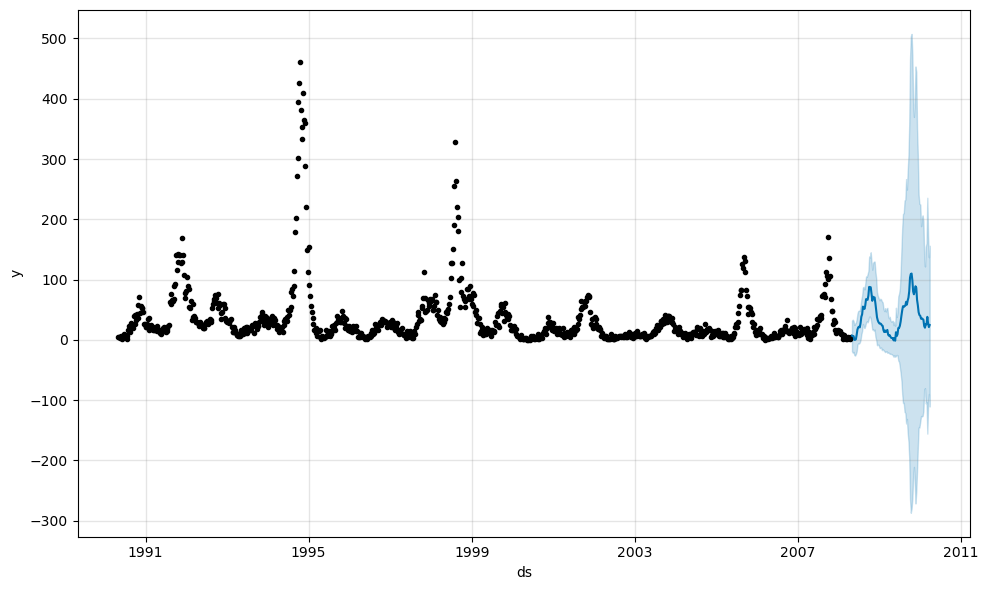

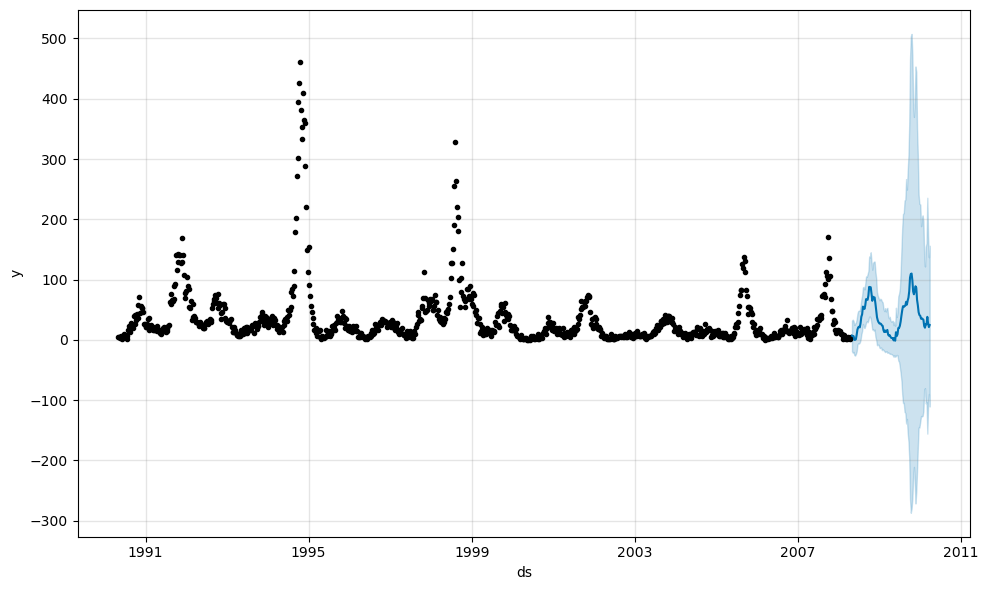

In [33]:
m.plot(forecast_sj[:100])

In [34]:
iq_data = data[data['city'] == 'iq']
iq_data = process_data(iq_data)


In [35]:
iq_data['avg_reanalysis'] = iq_data[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

iq_data['avg_ndvi'] = iq_data[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [36]:
iq_data.rename(columns = {'week_start_date':'ds','total_cases':'y'}, inplace=True)

In [45]:
test_df_iq = test_df_main[test_df_main['city']=='iq']

test_df_iq = process_data(test_df_iq)

test_df_iq['avg_reanalysis'] = test_df_iq[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)
test_df_iq['avg_ndvi'] = test_df_iq[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)


In [46]:
test_df_iq = test_df_iq[['week_start_date','avg_reanalysis','reanalysis_dew_point_temp_k','station_min_temp_c','reanalysis_specific_humidity_g_per_kg','avg_ndvi']]

In [47]:
test_df_iq.rename(columns = {'week_start_date':'ds'}, inplace=True)
test_df_iq.head()

,ds,avg_reanalysis,reanalysis_dew_point_temp_k,station_min_temp_c,reanalysis_specific_humidity_g_per_kg,avg_ndvi
260,2010-07-02,298.916286,296.118571,21.5,17.654286,0.175407
261,2010-07-09,298.484000,294.831429,21.2,16.320000,0.303885
262,2010-07-16,298.447429,296.417143,21.6,18.030000,0.260786
263,2010-07-23,296.339429,293.638571,14.2,15.394286,0.089129
264,2010-07-30,298.199143,293.892857,16.9,15.468571,0.287946


In [42]:
# Set up parameter grid
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.08, 0.5],
    'seasonality_prior_scale': [0.01, 1, 5, 12],
    'seasonality_mode': ['additive', 'multiplicative']
}
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# Create a list to store MAPE values for each combination
mapes = [] 
# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet(**params)
    m.add_regressor('avg_reanalysis')
    m.add_regressor('reanalysis_dew_point_temp_k')
    m.add_regressor('station_min_temp_c')
    m.add_regressor('avg_ndvi')
    m.add_regressor('reanalysis_specific_humidity_g_per_kg')
    m.fit(iq_data)
    # Cross-validation
    df_cv = cross_validation(m, initial='365.25 days', period='30 days', horizon = '30 days', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mae'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = mapes
# Find the best parameters
best_params = all_params[np.argmin(mapes)]
# Fit the model using the best parameters
auto_model_iq = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'], 
                     seasonality_prior_scale=best_params['seasonality_prior_scale'], 
                     seasonality_mode=best_params['seasonality_mode'])
# Fit the model on the training dataset
auto_model_iq.add_regressor('avg_reanalysis')
auto_model_iq.add_regressor('reanalysis_dew_point_temp_k')
auto_model_iq.add_regressor('station_min_temp_c')
auto_model_iq.add_regressor('avg_ndvi')
auto_model_iq.add_regressor('reanalysis_specific_humidity_g_per_kg')

auto_model_iq.fit(iq_data)

03:32:38 - cmdstanpy - INFO - Chain [1] start processing
03:32:38 - cmdstanpy - INFO - Chain [1] done processing
03:32:42 - cmdstanpy - INFO - Chain [1] start processing
03:32:42 - cmdstanpy - INFO - Chain [1] start processing
03:32:42 - cmdstanpy - INFO - Chain [1] start processing
03:32:42 - cmdstanpy - INFO - Chain [1] start processing
03:32:43 - cmdstanpy - INFO - Chain [1] done processing
03:32:43 - cmdstanpy - INFO - Chain [1] done processing
03:32:43 - cmdstanpy - INFO - Chain [1] done processing
03:32:43 - cmdstanpy - INFO - Chain [1] done processing
03:32:43 - cmdstanpy - INFO - Chain [1] start processing
03:32:43 - cmdstanpy - INFO - Chain [1] start processing
03:32:43 - cmdstanpy - INFO - Chain [1] start processing
03:32:43 - cmdstanpy - INFO - Chain [1] start processing
03:32:43 - cmdstanpy - INFO - Chain [1] done processing
03:32:44 - cmdstanpy - INFO - Chain [1] done processing
03:32:44 - cmdstanpy - INFO - Chain [1] done processing
03:32:44 - cmdstanpy - INFO - Chain [1]

03:32:52 - cmdstanpy - INFO - Chain [1] done processing
03:32:52 - cmdstanpy - INFO - Chain [1] done processing
03:32:52 - cmdstanpy - INFO - Chain [1] start processing
03:32:52 - cmdstanpy - INFO - Chain [1] done processing
03:32:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:32:52 - cmdstanpy - INFO - Chain [1] start processing
03:32:52 - cmdstanpy - INFO - Chain [1] start processing
03:32:52 - cmdstanpy - INFO - Chain [1] done processing
03:32:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:32:52 - cmdstanpy - INFO - Chain [1] start processing
03:32:53 - cmdstanpy - INFO - Chain [1] done processing
03:32:53 - cmdstanpy - INFO - Chain [1] start processing
03:32:53 - cmdstanpy - INFO - Chain [1] done processing
03:32:53 - cmdstanpy - INFO - Chain [1] start processing
03:32:53 -

03:33:04 - cmdstanpy - INFO - Chain [1] start processing
03:33:04 - cmdstanpy - INFO - Chain [1] start processing
03:33:04 - cmdstanpy - INFO - Chain [1] start processing
03:33:04 - cmdstanpy - INFO - Chain [1] done processing
03:33:04 - cmdstanpy - INFO - Chain [1] done processing
03:33:04 - cmdstanpy - INFO - Chain [1] done processing
03:33:04 - cmdstanpy - INFO - Chain [1] done processing
03:33:04 - cmdstanpy - INFO - Chain [1] start processing
03:33:04 - cmdstanpy - INFO - Chain [1] done processing
03:33:04 - cmdstanpy - INFO - Chain [1] start processing
03:33:04 - cmdstanpy - INFO - Chain [1] start processing
03:33:04 - cmdstanpy - INFO - Chain [1] done processing
03:33:04 - cmdstanpy - INFO - Chain [1] done processing
03:33:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:33:04 - cmdstanpy - INFO - Chain [1] start processing
03:33:04 - cmdstanpy - INFO - Chain [1] start process

03:33:19 - cmdstanpy - INFO - Chain [1] done processing
03:33:19 - cmdstanpy - INFO - Chain [1] done processing
03:33:19 - cmdstanpy - INFO - Chain [1] start processing
03:33:19 - cmdstanpy - INFO - Chain [1] done processing
03:33:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:33:19 - cmdstanpy - INFO - Chain [1] start processing
03:33:19 - cmdstanpy - INFO - Chain [1] start processing
03:33:19 - cmdstanpy - INFO - Chain [1] done processing
03:33:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:33:19 - cmdstanpy - INFO - Chain [1] start processing
03:33:19 - cmdstanpy - INFO - Chain [1] done processing
03:33:20 - cmdstanpy - INFO - Chain [1] start processing
03:33:20 - cmdstanpy - INFO - Chain [1] done processing
03:33:20 - cmdstanpy - ERROR - Chain [1] error: error during proces

03:33:27 - cmdstanpy - INFO - Chain [1] start processing
03:33:27 - cmdstanpy - INFO - Chain [1] done processing
03:33:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:33:27 - cmdstanpy - INFO - Chain [1] start processing
03:33:27 - cmdstanpy - INFO - Chain [1] start processing
03:33:27 - cmdstanpy - INFO - Chain [1] done processing
03:33:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:33:27 - cmdstanpy - INFO - Chain [1] start processing
03:33:27 - cmdstanpy - INFO - Chain [1] done processing
03:33:28 - cmdstanpy - INFO - Chain [1] start processing
03:33:28 - cmdstanpy - INFO - Chain [1] done processing
03:33:28 - cmdstanpy - INFO - Chain [1] start processing
03:33:28 - cmdstanpy - INFO - Chain [1] done processing
03:33:28 - cmdstanpy - INFO - Chain [1] done processing
03:33:28 -

03:33:37 - cmdstanpy - INFO - Chain [1] done processing
03:33:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:33:38 - cmdstanpy - INFO - Chain [1] start processing
03:33:38 - cmdstanpy - INFO - Chain [1] start processing
03:33:38 - cmdstanpy - INFO - Chain [1] done processing
03:33:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:33:38 - cmdstanpy - INFO - Chain [1] start processing
03:33:38 - cmdstanpy - INFO - Chain [1] start processing
03:33:38 - cmdstanpy - INFO - Chain [1] done processing
03:33:38 - cmdstanpy - INFO - Chain [1] start processing
03:33:38 - cmdstanpy - INFO - Chain [1] done processing
03:33:39 - cmdstanpy - INFO - Chain [1] start processing
03:33:39 - cmdstanpy - INFO - Chain [1] done processing
03:33:39 - cmdstanpy - ERROR - Chain [1] error: error during proce

03:33:53 - cmdstanpy - INFO - Chain [1] done processing
03:33:53 - cmdstanpy - INFO - Chain [1] done processing
03:33:53 - cmdstanpy - INFO - Chain [1] done processing
03:33:53 - cmdstanpy - INFO - Chain [1] start processing
03:33:53 - cmdstanpy - INFO - Chain [1] done processing
03:33:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:33:53 - cmdstanpy - INFO - Chain [1] start processing
03:33:53 - cmdstanpy - INFO - Chain [1] start processing
03:33:53 - cmdstanpy - INFO - Chain [1] done processing
03:33:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:33:53 - cmdstanpy - INFO - Chain [1] start processing
03:33:54 - cmdstanpy - INFO - Chain [1] start processing
03:33:54 - cmdstanpy - INFO - Chain [1] done processing
03:33:54 - cmdstanpy - ERROR - Chain [1] error: error during proces

03:34:02 - cmdstanpy - INFO - Chain [1] done processing
03:34:02 - cmdstanpy - INFO - Chain [1] start processing
03:34:02 - cmdstanpy - INFO - Chain [1] done processing
03:34:03 - cmdstanpy - INFO - Chain [1] done processing
03:34:03 - cmdstanpy - INFO - Chain [1] start processing
03:34:03 - cmdstanpy - INFO - Chain [1] done processing
03:34:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:34:03 - cmdstanpy - INFO - Chain [1] start processing
03:34:03 - cmdstanpy - INFO - Chain [1] start processing
03:34:03 - cmdstanpy - INFO - Chain [1] done processing
03:34:03 - cmdstanpy - INFO - Chain [1] done processing
03:34:04 - cmdstanpy - INFO - Chain [1] start processing
03:34:04 - cmdstanpy - INFO - Chain [1] start processing
03:34:04 - cmdstanpy - INFO - Chain [1] done processing
03:34:04 - cmdstanpy - INFO - Chain [1] done processing
03:34:04 - cmdstanpy - INFO - Chain [1] start processi

03:34:11 - cmdstanpy - INFO - Chain [1] start processing
03:34:12 - cmdstanpy - INFO - Chain [1] done processing
03:34:12 - cmdstanpy - INFO - Chain [1] start processing
03:34:12 - cmdstanpy - INFO - Chain [1] done processing
03:34:12 - cmdstanpy - INFO - Chain [1] done processing
03:34:12 - cmdstanpy - INFO - Chain [1] start processing
03:34:12 - cmdstanpy - INFO - Chain [1] done processing
03:34:12 - cmdstanpy - INFO - Chain [1] start processing
03:34:12 - cmdstanpy - INFO - Chain [1] start processing
03:34:12 - cmdstanpy - INFO - Chain [1] done processing
03:34:12 - cmdstanpy - INFO - Chain [1] start processing
03:34:12 - cmdstanpy - INFO - Chain [1] done processing
03:34:12 - cmdstanpy - INFO - Chain [1] start processing
03:34:12 - cmdstanpy - INFO - Chain [1] done processing
03:34:12 - cmdstanpy - INFO - Chain [1] done processing
03:34:12 - cmdstanpy - INFO - Chain [1] start processing
03:34:12 - cmdstanpy - INFO - Chain [1] done processing
03:34:16 - cmdstanpy - INFO - Chain [1] 

03:34:26 - cmdstanpy - INFO - Chain [1] done processing
03:34:26 - cmdstanpy - INFO - Chain [1] start processing
03:34:26 - cmdstanpy - INFO - Chain [1] done processing
03:34:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:34:27 - cmdstanpy - INFO - Chain [1] done processing
03:34:27 - cmdstanpy - INFO - Chain [1] start processing
03:34:27 - cmdstanpy - INFO - Chain [1] start processing
03:34:27 - cmdstanpy - INFO - Chain [1] done processing
03:34:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:34:27 - cmdstanpy - INFO - Chain [1] start processing
03:34:27 - cmdstanpy - INFO - Chain [1] done processing
03:34:27 - cmdstanpy - INFO - Chain [1] start processing
03:34:27 - cmdstanpy - INFO - Chain [1] done processing
03:34:27 - cmdstanpy - ERROR - Chain [1] error: error during proces

03:34:36 - cmdstanpy - INFO - Chain [1] start processing
03:34:36 - cmdstanpy - INFO - Chain [1] done processing
03:34:36 - cmdstanpy - INFO - Chain [1] done processing
03:34:36 - cmdstanpy - INFO - Chain [1] start processing
03:34:36 - cmdstanpy - INFO - Chain [1] done processing
03:34:36 - cmdstanpy - INFO - Chain [1] done processing
03:34:36 - cmdstanpy - INFO - Chain [1] start processing
03:34:36 - cmdstanpy - INFO - Chain [1] start processing
03:34:36 - cmdstanpy - INFO - Chain [1] done processing
03:34:36 - cmdstanpy - INFO - Chain [1] done processing
03:34:36 - cmdstanpy - INFO - Chain [1] start processing
03:34:36 - cmdstanpy - INFO - Chain [1] start processing
03:34:36 - cmdstanpy - INFO - Chain [1] done processing
03:34:36 - cmdstanpy - INFO - Chain [1] done processing
03:34:36 - cmdstanpy - INFO - Chain [1] start processing
03:34:36 - cmdstanpy - INFO - Chain [1] done processing
03:34:36 - cmdstanpy - INFO - Chain [1] start processing
03:34:36 - cmdstanpy - INFO - Chain [1] 

03:34:49 - cmdstanpy - INFO - Chain [1] done processing
03:34:49 - cmdstanpy - INFO - Chain [1] start processing
03:34:49 - cmdstanpy - INFO - Chain [1] done processing
03:34:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:34:49 - cmdstanpy - INFO - Chain [1] start processing
03:34:50 - cmdstanpy - INFO - Chain [1] done processing
03:34:50 - cmdstanpy - INFO - Chain [1] start processing
03:34:50 - cmdstanpy - INFO - Chain [1] done processing
03:34:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:34:50 - cmdstanpy - INFO - Chain [1] start processing
03:34:50 - cmdstanpy - INFO - Chain [1] done processing
03:34:50 - cmdstanpy - INFO - Chain [1] start processing
03:34:50 - cmdstanpy - INFO - Chain [1] done processing
03:34:50 - cmdstanpy - ERROR - Chain [1] error: error during proces

03:34:57 - cmdstanpy - INFO - Chain [1] start processing
03:34:57 - cmdstanpy - INFO - Chain [1] start processing
03:34:57 - cmdstanpy - INFO - Chain [1] done processing
03:34:57 - cmdstanpy - INFO - Chain [1] done processing
03:34:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:34:57 - cmdstanpy - INFO - Chain [1] start processing
03:34:57 - cmdstanpy - INFO - Chain [1] start processing
03:34:57 - cmdstanpy - INFO - Chain [1] done processing
03:34:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:34:57 - cmdstanpy - INFO - Chain [1] start processing
03:34:57 - cmdstanpy - INFO - Chain [1] start processing
03:34:57 - cmdstanpy - INFO - Chain [1] done processing
03:34:58 - cmdstanpy - INFO - Chain [1] start processing
03:34:58 - cmdstanpy - INFO - Chain [1] done processing
03:34:58 

03:35:04 - cmdstanpy - INFO - Chain [1] start processing
03:35:04 - cmdstanpy - INFO - Chain [1] done processing
03:35:05 - cmdstanpy - INFO - Chain [1] start processing
03:35:05 - cmdstanpy - INFO - Chain [1] done processing
03:35:05 - cmdstanpy - INFO - Chain [1] start processing
03:35:05 - cmdstanpy - INFO - Chain [1] done processing
03:35:05 - cmdstanpy - INFO - Chain [1] start processing
03:35:05 - cmdstanpy - INFO - Chain [1] done processing
03:35:05 - cmdstanpy - INFO - Chain [1] start processing
03:35:05 - cmdstanpy - INFO - Chain [1] done processing
03:35:06 - cmdstanpy - INFO - Chain [1] done processing
03:35:06 - cmdstanpy - INFO - Chain [1] done processing
03:35:06 - cmdstanpy - INFO - Chain [1] start processing
03:35:06 - cmdstanpy - INFO - Chain [1] start processing
03:35:06 - cmdstanpy - INFO - Chain [1] start processing
03:35:06 - cmdstanpy - INFO - Chain [1] done processing
03:35:06 - cmdstanpy - INFO - Chain [1] done processing
03:35:06 - cmdstanpy - ERROR - Chain [1]

03:35:23 - cmdstanpy - INFO - Chain [1] done processing
03:35:23 - cmdstanpy - INFO - Chain [1] done processing
03:35:23 - cmdstanpy - INFO - Chain [1] start processing
03:35:23 - cmdstanpy - INFO - Chain [1] start processing
03:35:23 - cmdstanpy - INFO - Chain [1] done processing
03:35:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:35:23 - cmdstanpy - INFO - Chain [1] done processing
03:35:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:35:23 - cmdstanpy - INFO - Chain [1] start processing
03:35:23 - cmdstanpy - INFO - Chain [1] start processing
03:35:23 - cmdstanpy - INFO - Chain [1] done processing
03:35:23 - cmdstanpy - INFO - Chain [1] start processing
03:35:23 - cmdstanpy - INFO - Chain [1] done processing
03:35:23 - cmdstanpy - ERROR - Chain [1] error: error during proces

03:35:32 - cmdstanpy - INFO - Chain [1] start processing
03:35:32 - cmdstanpy - INFO - Chain [1] start processing
03:35:32 - cmdstanpy - INFO - Chain [1] done processing
03:35:32 - cmdstanpy - INFO - Chain [1] start processing
03:35:32 - cmdstanpy - INFO - Chain [1] done processing
03:35:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:35:32 - cmdstanpy - INFO - Chain [1] done processing
03:35:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:35:32 - cmdstanpy - INFO - Chain [1] start processing
03:35:32 - cmdstanpy - INFO - Chain [1] start processing
03:35:32 - cmdstanpy - INFO - Chain [1] start processing
03:35:32 - cmdstanpy - INFO - Chain [1] done processing
03:35:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated ab

03:35:42 - cmdstanpy - INFO - Chain [1] done processing
03:35:42 - cmdstanpy - INFO - Chain [1] start processing
03:35:42 - cmdstanpy - INFO - Chain [1] done processing
03:35:43 - cmdstanpy - INFO - Chain [1] start processing
03:35:43 - cmdstanpy - INFO - Chain [1] done processing
03:35:43 - cmdstanpy - INFO - Chain [1] start processing
03:35:43 - cmdstanpy - INFO - Chain [1] done processing
03:35:43 - cmdstanpy - INFO - Chain [1] done processing
03:35:43 - cmdstanpy - INFO - Chain [1] start processing
03:35:44 - cmdstanpy - INFO - Chain [1] done processing
03:35:44 - cmdstanpy - INFO - Chain [1] start processing
03:35:44 - cmdstanpy - INFO - Chain [1] done processing
03:35:44 - cmdstanpy - INFO - Chain [1] start processing
03:35:44 - cmdstanpy - INFO - Chain [1] done processing
03:35:44 - cmdstanpy - INFO - Chain [1] start processing
03:35:44 - cmdstanpy - INFO - Chain [1] done processing
03:35:44 - cmdstanpy - INFO - Chain [1] start processing
03:35:44 - cmdstanpy - INFO - Chain [1] 

03:36:07 - cmdstanpy - INFO - Chain [1] done processing
03:36:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:36:07 - cmdstanpy - INFO - Chain [1] start processing
03:36:07 - cmdstanpy - INFO - Chain [1] done processing
03:36:08 - cmdstanpy - INFO - Chain [1] start processing
03:36:08 - cmdstanpy - INFO - Chain [1] done processing
03:36:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:36:08 - cmdstanpy - INFO - Chain [1] start processing
03:36:08 - cmdstanpy - INFO - Chain [1] done processing
03:36:09 - cmdstanpy - INFO - Chain [1] start processing
03:36:09 - cmdstanpy - INFO - Chain [1] done processing
03:36:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:36:09 - cmdstanpy - I

03:36:22 - cmdstanpy - INFO - Chain [1] start processing
03:36:22 - cmdstanpy - INFO - Chain [1] done processing
03:36:22 - cmdstanpy - INFO - Chain [1] start processing
03:36:22 - cmdstanpy - INFO - Chain [1] done processing
03:36:22 - cmdstanpy - INFO - Chain [1] start processing
03:36:22 - cmdstanpy - INFO - Chain [1] done processing
03:36:23 - cmdstanpy - INFO - Chain [1] start processing
03:36:23 - cmdstanpy - INFO - Chain [1] done processing
03:36:23 - cmdstanpy - INFO - Chain [1] start processing
03:36:23 - cmdstanpy - INFO - Chain [1] done processing
03:36:23 - cmdstanpy - INFO - Chain [1] done processing
03:36:23 - cmdstanpy - INFO - Chain [1] start processing
03:36:23 - cmdstanpy - INFO - Chain [1] start processing
03:36:23 - cmdstanpy - INFO - Chain [1] done processing
03:36:23 - cmdstanpy - INFO - Chain [1] done processing
03:36:23 - cmdstanpy - INFO - Chain [1] start processing
03:36:23 - cmdstanpy - INFO - Chain [1] start processing
03:36:23 - cmdstanpy - INFO - Chain [1]

03:36:49 - cmdstanpy - INFO - Chain [1] done processing
03:36:49 - cmdstanpy - INFO - Chain [1] done processing
03:36:49 - cmdstanpy - INFO - Chain [1] start processing
03:36:49 - cmdstanpy - INFO - Chain [1] start processing
03:36:49 - cmdstanpy - INFO - Chain [1] done processing
03:36:50 - cmdstanpy - INFO - Chain [1] start processing
03:36:50 - cmdstanpy - INFO - Chain [1] done processing
03:36:50 - cmdstanpy - INFO - Chain [1] start processing
03:36:50 - cmdstanpy - INFO - Chain [1] done processing
03:36:51 - cmdstanpy - INFO - Chain [1] start processing
03:36:51 - cmdstanpy - INFO - Chain [1] done processing
03:36:51 - cmdstanpy - INFO - Chain [1] done processing
03:36:51 - cmdstanpy - INFO - Chain [1] start processing
03:36:51 - cmdstanpy - INFO - Chain [1] done processing
03:36:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:36:51 - cmdstanpy - INFO - Chain [1] start processi

03:37:00 - cmdstanpy - INFO - Chain [1] done processing
03:37:00 - cmdstanpy - INFO - Chain [1] start processing
03:37:00 - cmdstanpy - INFO - Chain [1] done processing
03:37:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:37:00 - cmdstanpy - INFO - Chain [1] start processing
03:37:00 - cmdstanpy - INFO - Chain [1] done processing
03:37:01 - cmdstanpy - INFO - Chain [1] start processing
03:37:01 - cmdstanpy - INFO - Chain [1] done processing
03:37:01 - cmdstanpy - INFO - Chain [1] done processing
03:37:01 - cmdstanpy - INFO - Chain [1] start processing
03:37:01 - cmdstanpy - INFO - Chain [1] done processing
03:37:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:37:01 - cmdstanpy - INFO - Chain [1] start processing
03:37:01 - cmdstanpy - INFO - Chain [1] start processing
03:37:01 -

03:37:09 - cmdstanpy - INFO - Chain [1] done processing
03:37:09 - cmdstanpy - INFO - Chain [1] start processing
03:37:09 - cmdstanpy - INFO - Chain [1] done processing
03:37:09 - cmdstanpy - INFO - Chain [1] start processing
03:37:09 - cmdstanpy - INFO - Chain [1] done processing
03:37:09 - cmdstanpy - INFO - Chain [1] start processing
03:37:09 - cmdstanpy - INFO - Chain [1] done processing
03:37:09 - cmdstanpy - INFO - Chain [1] start processing
03:37:09 - cmdstanpy - INFO - Chain [1] done processing
03:37:09 - cmdstanpy - INFO - Chain [1] start processing
03:37:09 - cmdstanpy - INFO - Chain [1] done processing
03:37:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:37:09 - cmdstanpy - INFO - Chain [1] start processing
03:37:09 - cmdstanpy - INFO - Chain [1] start processing
03:37:09 - cmdstanpy - INFO - Chain [1] done processing
03:37:09 - cmdstanpy - ERROR - Chain [1] error: error

03:37:23 - cmdstanpy - INFO - Chain [1] start processing
03:37:23 - cmdstanpy - INFO - Chain [1] start processing
03:37:23 - cmdstanpy - INFO - Chain [1] done processing
03:37:23 - cmdstanpy - INFO - Chain [1] start processing
03:37:23 - cmdstanpy - INFO - Chain [1] done processing
03:37:23 - cmdstanpy - INFO - Chain [1] done processing
03:37:23 - cmdstanpy - INFO - Chain [1] start processing
03:37:23 - cmdstanpy - INFO - Chain [1] done processing
03:37:23 - cmdstanpy - INFO - Chain [1] start processing
03:37:23 - cmdstanpy - INFO - Chain [1] start processing
03:37:23 - cmdstanpy - INFO - Chain [1] start processing
03:37:23 - cmdstanpy - INFO - Chain [1] done processing
03:37:23 - cmdstanpy - INFO - Chain [1] done processing
03:37:23 - cmdstanpy - INFO - Chain [1] done processing
03:37:23 - cmdstanpy - INFO - Chain [1] start processing
03:37:23 - cmdstanpy - INFO - Chain [1] done processing
03:37:23 - cmdstanpy - INFO - Chain [1] start processing
03:37:23 - cmdstanpy - INFO - Chain [1]

03:37:29 - cmdstanpy - INFO - Chain [1] start processing
03:37:29 - cmdstanpy - INFO - Chain [1] start processing
03:37:29 - cmdstanpy - INFO - Chain [1] start processing
03:37:29 - cmdstanpy - INFO - Chain [1] start processing
03:37:29 - cmdstanpy - INFO - Chain [1] done processing
03:37:29 - cmdstanpy - INFO - Chain [1] done processing
03:37:29 - cmdstanpy - INFO - Chain [1] done processing
03:37:29 - cmdstanpy - INFO - Chain [1] done processing
03:37:29 - cmdstanpy - INFO - Chain [1] start processing
03:37:29 - cmdstanpy - INFO - Chain [1] start processing
03:37:29 - cmdstanpy - INFO - Chain [1] done processing
03:37:29 - cmdstanpy - INFO - Chain [1] start processing
03:37:29 - cmdstanpy - INFO - Chain [1] done processing
03:37:29 - cmdstanpy - INFO - Chain [1] start processing
03:37:29 - cmdstanpy - INFO - Chain [1] done processing
03:37:29 - cmdstanpy - INFO - Chain [1] done processing
03:37:29 - cmdstanpy - INFO - Chain [1] start processing
03:37:29 - cmdstanpy - INFO - Chain [1]

03:37:40 - cmdstanpy - INFO - Chain [1] start processing
03:37:40 - cmdstanpy - INFO - Chain [1] start processing
03:37:40 - cmdstanpy - INFO - Chain [1] start processing
03:37:40 - cmdstanpy - INFO - Chain [1] start processing
03:37:40 - cmdstanpy - INFO - Chain [1] done processing
03:37:40 - cmdstanpy - INFO - Chain [1] done processing
03:37:40 - cmdstanpy - INFO - Chain [1] done processing
03:37:40 - cmdstanpy - INFO - Chain [1] done processing
03:37:40 - cmdstanpy - INFO - Chain [1] start processing
03:37:40 - cmdstanpy - INFO - Chain [1] start processing
03:37:40 - cmdstanpy - INFO - Chain [1] start processing
03:37:41 - cmdstanpy - INFO - Chain [1] start processing
03:37:41 - cmdstanpy - INFO - Chain [1] done processing
03:37:41 - cmdstanpy - INFO - Chain [1] done processing
03:37:41 - cmdstanpy - INFO - Chain [1] done processing
03:37:41 - cmdstanpy - INFO - Chain [1] done processing
03:37:41 - cmdstanpy - INFO - Chain [1] start processing
03:37:41 - cmdstanpy - INFO - Chain [1]

03:37:52 - cmdstanpy - INFO - Chain [1] done processing
03:37:52 - cmdstanpy - INFO - Chain [1] start processing
03:37:52 - cmdstanpy - INFO - Chain [1] done processing
03:37:52 - cmdstanpy - INFO - Chain [1] done processing
03:37:52 - cmdstanpy - INFO - Chain [1] start processing
03:37:52 - cmdstanpy - INFO - Chain [1] done processing
03:37:52 - cmdstanpy - INFO - Chain [1] start processing
03:37:52 - cmdstanpy - INFO - Chain [1] start processing
03:37:52 - cmdstanpy - INFO - Chain [1] done processing
03:37:52 - cmdstanpy - INFO - Chain [1] done processing
03:37:52 - cmdstanpy - INFO - Chain [1] start processing
03:37:52 - cmdstanpy - INFO - Chain [1] done processing
03:37:52 - cmdstanpy - INFO - Chain [1] start processing
03:37:52 - cmdstanpy - INFO - Chain [1] done processing
03:37:52 - cmdstanpy - INFO - Chain [1] start processing
03:37:52 - cmdstanpy - INFO - Chain [1] start processing
03:37:52 - cmdstanpy - INFO - Chain [1] done processing
03:37:52 - cmdstanpy - INFO - Chain [1] 

03:37:59 - cmdstanpy - INFO - Chain [1] done processing
03:37:59 - cmdstanpy - INFO - Chain [1] start processing
03:37:59 - cmdstanpy - INFO - Chain [1] start processing
03:37:59 - cmdstanpy - INFO - Chain [1] start processing
03:37:59 - cmdstanpy - INFO - Chain [1] done processing
03:37:59 - cmdstanpy - INFO - Chain [1] start processing
03:37:59 - cmdstanpy - INFO - Chain [1] done processing
03:37:59 - cmdstanpy - INFO - Chain [1] done processing
03:37:59 - cmdstanpy - INFO - Chain [1] done processing
03:37:59 - cmdstanpy - INFO - Chain [1] start processing
03:37:59 - cmdstanpy - INFO - Chain [1] start processing
03:37:59 - cmdstanpy - INFO - Chain [1] start processing
03:37:59 - cmdstanpy - INFO - Chain [1] done processing
03:37:59 - cmdstanpy - INFO - Chain [1] start processing
03:37:59 - cmdstanpy - INFO - Chain [1] done processing
03:37:59 - cmdstanpy - INFO - Chain [1] done processing
03:37:59 - cmdstanpy - INFO - Chain [1] done processing
03:38:00 - cmdstanpy - INFO - Chain [1] 

03:38:11 - cmdstanpy - INFO - Chain [1] start processing
03:38:11 - cmdstanpy - INFO - Chain [1] start processing
03:38:11 - cmdstanpy - INFO - Chain [1] done processing
03:38:11 - cmdstanpy - INFO - Chain [1] start processing
03:38:11 - cmdstanpy - INFO - Chain [1] done processing
03:38:11 - cmdstanpy - INFO - Chain [1] start processing
03:38:11 - cmdstanpy - INFO - Chain [1] done processing
03:38:11 - cmdstanpy - INFO - Chain [1] done processing
03:38:11 - cmdstanpy - INFO - Chain [1] start processing
03:38:11 - cmdstanpy - INFO - Chain [1] start processing
03:38:11 - cmdstanpy - INFO - Chain [1] done processing
03:38:11 - cmdstanpy - INFO - Chain [1] done processing
03:38:11 - cmdstanpy - INFO - Chain [1] start processing
03:38:11 - cmdstanpy - INFO - Chain [1] start processing
03:38:11 - cmdstanpy - INFO - Chain [1] done processing
03:38:11 - cmdstanpy - INFO - Chain [1] done processing
03:38:11 - cmdstanpy - INFO - Chain [1] start processing
03:38:12 - cmdstanpy - INFO - Chain [1]

03:38:23 - cmdstanpy - INFO - Chain [1] done processing
03:38:23 - cmdstanpy - INFO - Chain [1] start processing
03:38:23 - cmdstanpy - INFO - Chain [1] start processing
03:38:23 - cmdstanpy - INFO - Chain [1] start processing
03:38:23 - cmdstanpy - INFO - Chain [1] done processing
03:38:23 - cmdstanpy - INFO - Chain [1] done processing
03:38:23 - cmdstanpy - INFO - Chain [1] done processing
03:38:23 - cmdstanpy - INFO - Chain [1] start processing
03:38:23 - cmdstanpy - INFO - Chain [1] done processing
03:38:23 - cmdstanpy - INFO - Chain [1] start processing
03:38:23 - cmdstanpy - INFO - Chain [1] start processing
03:38:23 - cmdstanpy - INFO - Chain [1] start processing
03:38:23 - cmdstanpy - INFO - Chain [1] done processing
03:38:23 - cmdstanpy - INFO - Chain [1] done processing
03:38:23 - cmdstanpy - INFO - Chain [1] start processing
03:38:23 - cmdstanpy - INFO - Chain [1] done processing
03:38:23 - cmdstanpy - INFO - Chain [1] done processing
03:38:23 - cmdstanpy - INFO - Chain [1] 

03:38:28 - cmdstanpy - INFO - Chain [1] start processing
03:38:28 - cmdstanpy - INFO - Chain [1] start processing
03:38:28 - cmdstanpy - INFO - Chain [1] start processing
03:38:28 - cmdstanpy - INFO - Chain [1] done processing
03:38:28 - cmdstanpy - INFO - Chain [1] start processing
03:38:28 - cmdstanpy - INFO - Chain [1] done processing
03:38:29 - cmdstanpy - INFO - Chain [1] done processing
03:38:29 - cmdstanpy - INFO - Chain [1] done processing
03:38:29 - cmdstanpy - INFO - Chain [1] start processing
03:38:29 - cmdstanpy - INFO - Chain [1] done processing
03:38:29 - cmdstanpy - INFO - Chain [1] start processing
03:38:29 - cmdstanpy - INFO - Chain [1] done processing
03:38:32 - cmdstanpy - INFO - Chain [1] start processing
03:38:32 - cmdstanpy - INFO - Chain [1] start processing
03:38:32 - cmdstanpy - INFO - Chain [1] start processing
03:38:32 - cmdstanpy - INFO - Chain [1] start processing
03:38:33 - cmdstanpy - INFO - Chain [1] done processing
03:38:33 - cmdstanpy - INFO - Chain [1

03:38:40 - cmdstanpy - INFO - Chain [1] done processing
03:38:40 - cmdstanpy - INFO - Chain [1] start processing
03:38:40 - cmdstanpy - INFO - Chain [1] start processing
03:38:40 - cmdstanpy - INFO - Chain [1] start processing
03:38:40 - cmdstanpy - INFO - Chain [1] done processing
03:38:40 - cmdstanpy - INFO - Chain [1] start processing
03:38:40 - cmdstanpy - INFO - Chain [1] done processing
03:38:40 - cmdstanpy - INFO - Chain [1] done processing
03:38:41 - cmdstanpy - INFO - Chain [1] done processing
03:38:41 - cmdstanpy - INFO - Chain [1] start processing
03:38:41 - cmdstanpy - INFO - Chain [1] start processing
03:38:41 - cmdstanpy - INFO - Chain [1] start processing
03:38:41 - cmdstanpy - INFO - Chain [1] start processing
03:38:41 - cmdstanpy - INFO - Chain [1] done processing
03:38:41 - cmdstanpy - INFO - Chain [1] done processing
03:38:41 - cmdstanpy - INFO - Chain [1] done processing
03:38:41 - cmdstanpy - INFO - Chain [1] done processing
03:38:41 - cmdstanpy - INFO - Chain [1] 

03:38:52 - cmdstanpy - INFO - Chain [1] start processing
03:38:52 - cmdstanpy - INFO - Chain [1] start processing
03:38:52 - cmdstanpy - INFO - Chain [1] start processing
03:38:52 - cmdstanpy - INFO - Chain [1] done processing
03:38:52 - cmdstanpy - INFO - Chain [1] done processing
03:38:52 - cmdstanpy - INFO - Chain [1] done processing
03:38:52 - cmdstanpy - INFO - Chain [1] start processing
03:38:52 - cmdstanpy - INFO - Chain [1] done processing
03:38:52 - cmdstanpy - INFO - Chain [1] start processing
03:38:52 - cmdstanpy - INFO - Chain [1] start processing
03:38:52 - cmdstanpy - INFO - Chain [1] start processing
03:38:52 - cmdstanpy - INFO - Chain [1] done processing
03:38:52 - cmdstanpy - INFO - Chain [1] done processing
03:38:52 - cmdstanpy - INFO - Chain [1] done processing
03:38:52 - cmdstanpy - INFO - Chain [1] start processing
03:38:52 - cmdstanpy - INFO - Chain [1] done processing
03:38:53 - cmdstanpy - INFO - Chain [1] start processing
03:38:53 - cmdstanpy - INFO - Chain [1]

03:38:58 - cmdstanpy - INFO - Chain [1] start processing
03:38:58 - cmdstanpy - INFO - Chain [1] done processing
03:39:01 - cmdstanpy - INFO - Chain [1] start processing
03:39:01 - cmdstanpy - INFO - Chain [1] start processing
03:39:01 - cmdstanpy - INFO - Chain [1] start processing
03:39:02 - cmdstanpy - INFO - Chain [1] start processing
03:39:02 - cmdstanpy - INFO - Chain [1] done processing
03:39:02 - cmdstanpy - INFO - Chain [1] done processing
03:39:02 - cmdstanpy - INFO - Chain [1] done processing
03:39:02 - cmdstanpy - INFO - Chain [1] start processing
03:39:02 - cmdstanpy - INFO - Chain [1] start processing
03:39:02 - cmdstanpy - INFO - Chain [1] start processing
03:39:02 - cmdstanpy - INFO - Chain [1] done processing
03:39:02 - cmdstanpy - INFO - Chain [1] start processing
03:39:03 - cmdstanpy - INFO - Chain [1] done processing
03:39:03 - cmdstanpy - INFO - Chain [1] start processing
03:39:03 - cmdstanpy - INFO - Chain [1] done processing
03:39:03 - cmdstanpy - INFO - Chain [1

03:39:10 - cmdstanpy - INFO - Chain [1] done processing
03:39:10 - cmdstanpy - INFO - Chain [1] done processing
03:39:10 - cmdstanpy - INFO - Chain [1] start processing
03:39:10 - cmdstanpy - INFO - Chain [1] start processing
03:39:10 - cmdstanpy - INFO - Chain [1] start processing
03:39:10 - cmdstanpy - INFO - Chain [1] start processing
03:39:10 - cmdstanpy - INFO - Chain [1] done processing
03:39:10 - cmdstanpy - INFO - Chain [1] done processing
03:39:10 - cmdstanpy - INFO - Chain [1] done processing
03:39:11 - cmdstanpy - INFO - Chain [1] done processing
03:39:11 - cmdstanpy - INFO - Chain [1] start processing
03:39:11 - cmdstanpy - INFO - Chain [1] start processing
03:39:11 - cmdstanpy - INFO - Chain [1] start processing
03:39:11 - cmdstanpy - INFO - Chain [1] start processing
03:39:11 - cmdstanpy - INFO - Chain [1] done processing
03:39:11 - cmdstanpy - INFO - Chain [1] done processing
03:39:11 - cmdstanpy - INFO - Chain [1] done processing
03:39:11 - cmdstanpy - INFO - Chain [1] 

03:39:23 - cmdstanpy - INFO - Chain [1] done processing
03:39:23 - cmdstanpy - INFO - Chain [1] start processing
03:39:23 - cmdstanpy - INFO - Chain [1] start processing
03:39:23 - cmdstanpy - INFO - Chain [1] start processing
03:39:23 - cmdstanpy - INFO - Chain [1] start processing
03:39:23 - cmdstanpy - INFO - Chain [1] done processing
03:39:23 - cmdstanpy - INFO - Chain [1] done processing
03:39:23 - cmdstanpy - INFO - Chain [1] done processing
03:39:23 - cmdstanpy - INFO - Chain [1] done processing
03:39:23 - cmdstanpy - INFO - Chain [1] start processing
03:39:23 - cmdstanpy - INFO - Chain [1] start processing
03:39:23 - cmdstanpy - INFO - Chain [1] start processing
03:39:23 - cmdstanpy - INFO - Chain [1] start processing
03:39:23 - cmdstanpy - INFO - Chain [1] done processing
03:39:23 - cmdstanpy - INFO - Chain [1] done processing
03:39:23 - cmdstanpy - INFO - Chain [1] done processing
03:39:23 - cmdstanpy - INFO - Chain [1] done processing
03:39:24 - cmdstanpy - INFO - Chain [1] 

03:39:31 - cmdstanpy - INFO - Chain [1] done processing
03:39:31 - cmdstanpy - INFO - Chain [1] done processing
03:39:32 - cmdstanpy - INFO - Chain [1] start processing
03:39:32 - cmdstanpy - INFO - Chain [1] done processing
03:39:35 - cmdstanpy - INFO - Chain [1] start processing
03:39:35 - cmdstanpy - INFO - Chain [1] start processing
03:39:35 - cmdstanpy - INFO - Chain [1] start processing
03:39:35 - cmdstanpy - INFO - Chain [1] start processing
03:39:36 - cmdstanpy - INFO - Chain [1] done processing
03:39:36 - cmdstanpy - INFO - Chain [1] done processing
03:39:36 - cmdstanpy - INFO - Chain [1] start processing
03:39:36 - cmdstanpy - INFO - Chain [1] done processing
03:39:36 - cmdstanpy - INFO - Chain [1] done processing
03:39:36 - cmdstanpy - INFO - Chain [1] start processing
03:39:36 - cmdstanpy - INFO - Chain [1] start processing
03:39:36 - cmdstanpy - INFO - Chain [1] start processing
03:39:37 - cmdstanpy - INFO - Chain [1] done processing
03:39:37 - cmdstanpy - INFO - Chain [1]

03:39:46 - cmdstanpy - INFO - Chain [1] start processing
03:39:46 - cmdstanpy - INFO - Chain [1] start processing
03:39:46 - cmdstanpy - INFO - Chain [1] done processing
03:39:46 - cmdstanpy - INFO - Chain [1] done processing
03:39:46 - cmdstanpy - INFO - Chain [1] done processing
03:39:46 - cmdstanpy - INFO - Chain [1] done processing
03:39:46 - cmdstanpy - INFO - Chain [1] start processing
03:39:46 - cmdstanpy - INFO - Chain [1] start processing
03:39:46 - cmdstanpy - INFO - Chain [1] start processing
03:39:46 - cmdstanpy - INFO - Chain [1] start processing
03:39:46 - cmdstanpy - INFO - Chain [1] done processing
03:39:46 - cmdstanpy - INFO - Chain [1] done processing
03:39:46 - cmdstanpy - INFO - Chain [1] done processing
03:39:46 - cmdstanpy - INFO - Chain [1] start processing
03:39:46 - cmdstanpy - INFO - Chain [1] done processing
03:39:46 - cmdstanpy - INFO - Chain [1] start processing
03:39:47 - cmdstanpy - INFO - Chain [1] start processing
03:39:47 - cmdstanpy - INFO - Chain [1]

03:40:01 - cmdstanpy - INFO - Chain [1] done processing
03:40:01 - cmdstanpy - INFO - Chain [1] done processing
03:40:01 - cmdstanpy - INFO - Chain [1] start processing
03:40:01 - cmdstanpy - INFO - Chain [1] start processing
03:40:01 - cmdstanpy - INFO - Chain [1] start processing
03:40:01 - cmdstanpy - INFO - Chain [1] done processing
03:40:01 - cmdstanpy - INFO - Chain [1] done processing
03:40:01 - cmdstanpy - INFO - Chain [1] start processing
03:40:01 - cmdstanpy - INFO - Chain [1] done processing
03:40:01 - cmdstanpy - INFO - Chain [1] done processing
03:40:01 - cmdstanpy - INFO - Chain [1] start processing
03:40:01 - cmdstanpy - INFO - Chain [1] start processing
03:40:01 - cmdstanpy - INFO - Chain [1] done processing
03:40:01 - cmdstanpy - INFO - Chain [1] start processing
03:40:01 - cmdstanpy - INFO - Chain [1] done processing
03:40:01 - cmdstanpy - INFO - Chain [1] start processing
03:40:02 - cmdstanpy - INFO - Chain [1] done processing
03:40:02 - cmdstanpy - INFO - Chain [1] 

03:40:09 - cmdstanpy - INFO - Chain [1] done processing
03:40:10 - cmdstanpy - INFO - Chain [1] start processing
03:40:10 - cmdstanpy - INFO - Chain [1] done processing
03:40:13 - cmdstanpy - INFO - Chain [1] start processing
03:40:13 - cmdstanpy - INFO - Chain [1] start processing
03:40:13 - cmdstanpy - INFO - Chain [1] start processing
03:40:13 - cmdstanpy - INFO - Chain [1] start processing
03:40:14 - cmdstanpy - INFO - Chain [1] done processing
03:40:14 - cmdstanpy - INFO - Chain [1] done processing
03:40:14 - cmdstanpy - INFO - Chain [1] start processing
03:40:14 - cmdstanpy - INFO - Chain [1] start processing
03:40:15 - cmdstanpy - INFO - Chain [1] done processing
03:40:15 - cmdstanpy - INFO - Chain [1] start processing
03:40:15 - cmdstanpy - INFO - Chain [1] done processing
03:40:15 - cmdstanpy - INFO - Chain [1] start processing
03:40:16 - cmdstanpy - INFO - Chain [1] done processing
03:40:16 - cmdstanpy - INFO - Chain [1] start processing
03:40:16 - cmdstanpy - INFO - Chain [1

03:40:26 - cmdstanpy - INFO - Chain [1] start processing
03:40:26 - cmdstanpy - INFO - Chain [1] done processing
03:40:26 - cmdstanpy - INFO - Chain [1] start processing
03:40:26 - cmdstanpy - INFO - Chain [1] start processing
03:40:26 - cmdstanpy - INFO - Chain [1] start processing
03:40:26 - cmdstanpy - INFO - Chain [1] done processing
03:40:26 - cmdstanpy - INFO - Chain [1] done processing
03:40:27 - cmdstanpy - INFO - Chain [1] done processing
03:40:27 - cmdstanpy - INFO - Chain [1] done processing
03:40:27 - cmdstanpy - INFO - Chain [1] start processing
03:40:27 - cmdstanpy - INFO - Chain [1] start processing
03:40:27 - cmdstanpy - INFO - Chain [1] start processing
03:40:27 - cmdstanpy - INFO - Chain [1] start processing
03:40:27 - cmdstanpy - INFO - Chain [1] done processing
03:40:27 - cmdstanpy - INFO - Chain [1] done processing
03:40:27 - cmdstanpy - INFO - Chain [1] start processing
03:40:27 - cmdstanpy - INFO - Chain [1] done processing
03:40:27 - cmdstanpy - INFO - Chain [1]

03:40:43 - cmdstanpy - INFO - Chain [1] start processing
03:40:43 - cmdstanpy - INFO - Chain [1] start processing
03:40:43 - cmdstanpy - INFO - Chain [1] start processing
03:40:43 - cmdstanpy - INFO - Chain [1] start processing
03:40:43 - cmdstanpy - INFO - Chain [1] done processing
03:40:43 - cmdstanpy - INFO - Chain [1] done processing
03:40:43 - cmdstanpy - INFO - Chain [1] done processing
03:40:43 - cmdstanpy - INFO - Chain [1] done processing
03:40:43 - cmdstanpy - INFO - Chain [1] start processing
03:40:43 - cmdstanpy - INFO - Chain [1] start processing
03:40:43 - cmdstanpy - INFO - Chain [1] start processing
03:40:43 - cmdstanpy - INFO - Chain [1] start processing
03:40:43 - cmdstanpy - INFO - Chain [1] done processing
03:40:44 - cmdstanpy - INFO - Chain [1] done processing
03:40:44 - cmdstanpy - INFO - Chain [1] done processing
03:40:44 - cmdstanpy - INFO - Chain [1] done processing
03:40:44 - cmdstanpy - INFO - Chain [1] start processing
03:40:44 - cmdstanpy - INFO - Chain [1]

03:40:56 - cmdstanpy - INFO - Chain [1] done processing
03:40:56 - cmdstanpy - INFO - Chain [1] start processing
03:40:56 - cmdstanpy - INFO - Chain [1] done processing
03:40:56 - cmdstanpy - INFO - Chain [1] start processing
03:40:57 - cmdstanpy - INFO - Chain [1] done processing
03:40:57 - cmdstanpy - INFO - Chain [1] done processing
03:40:57 - cmdstanpy - INFO - Chain [1] start processing
03:40:57 - cmdstanpy - INFO - Chain [1] start processing
03:40:58 - cmdstanpy - INFO - Chain [1] done processing
03:40:58 - cmdstanpy - INFO - Chain [1] start processing
03:41:00 - cmdstanpy - INFO - Chain [1] done processing
03:41:00 - cmdstanpy - INFO - Chain [1] start processing
03:41:00 - cmdstanpy - INFO - Chain [1] done processing
03:41:00 - cmdstanpy - INFO - Chain [1] done processing
03:41:00 - cmdstanpy - INFO - Chain [1] start processing
03:41:00 - cmdstanpy - INFO - Chain [1] start processing
03:41:01 - cmdstanpy - INFO - Chain [1] done processing
03:41:01 - cmdstanpy - INFO - Chain [1] 

03:41:09 - cmdstanpy - INFO - Chain [1] start processing
03:41:09 - cmdstanpy - INFO - Chain [1] start processing
03:41:09 - cmdstanpy - INFO - Chain [1] start processing
03:41:09 - cmdstanpy - INFO - Chain [1] done processing
03:41:09 - cmdstanpy - INFO - Chain [1] done processing
03:41:09 - cmdstanpy - INFO - Chain [1] done processing
03:41:09 - cmdstanpy - INFO - Chain [1] done processing
03:41:09 - cmdstanpy - INFO - Chain [1] start processing
03:41:09 - cmdstanpy - INFO - Chain [1] start processing
03:41:09 - cmdstanpy - INFO - Chain [1] start processing
03:41:10 - cmdstanpy - INFO - Chain [1] start processing
03:41:10 - cmdstanpy - INFO - Chain [1] done processing
03:41:10 - cmdstanpy - INFO - Chain [1] done processing
03:41:10 - cmdstanpy - INFO - Chain [1] done processing
03:41:10 - cmdstanpy - INFO - Chain [1] done processing
03:41:10 - cmdstanpy - INFO - Chain [1] start processing
03:41:10 - cmdstanpy - INFO - Chain [1] start processing
03:41:10 - cmdstanpy - INFO - Chain [1]

03:41:25 - cmdstanpy - INFO - Chain [1] start processing
03:41:25 - cmdstanpy - INFO - Chain [1] done processing
03:41:25 - cmdstanpy - INFO - Chain [1] done processing
03:41:25 - cmdstanpy - INFO - Chain [1] done processing
03:41:26 - cmdstanpy - INFO - Chain [1] start processing
03:41:26 - cmdstanpy - INFO - Chain [1] start processing
03:41:26 - cmdstanpy - INFO - Chain [1] start processing
03:41:26 - cmdstanpy - INFO - Chain [1] done processing
03:41:26 - cmdstanpy - INFO - Chain [1] done processing
03:41:26 - cmdstanpy - INFO - Chain [1] done processing
03:41:26 - cmdstanpy - INFO - Chain [1] done processing
03:41:26 - cmdstanpy - INFO - Chain [1] start processing
03:41:26 - cmdstanpy - INFO - Chain [1] start processing
03:41:26 - cmdstanpy - INFO - Chain [1] start processing
03:41:26 - cmdstanpy - INFO - Chain [1] start processing
03:41:26 - cmdstanpy - INFO - Chain [1] done processing
03:41:26 - cmdstanpy - INFO - Chain [1] done processing
03:41:26 - cmdstanpy - INFO - Chain [1] 

03:41:40 - cmdstanpy - INFO - Chain [1] done processing
03:41:40 - cmdstanpy - INFO - Chain [1] start processing
03:41:40 - cmdstanpy - INFO - Chain [1] done processing
03:41:40 - cmdstanpy - INFO - Chain [1] start processing
03:41:42 - cmdstanpy - INFO - Chain [1] done processing
03:41:42 - cmdstanpy - INFO - Chain [1] start processing
03:41:43 - cmdstanpy - INFO - Chain [1] done processing
03:41:43 - cmdstanpy - INFO - Chain [1] start processing
03:41:45 - cmdstanpy - INFO - Chain [1] done processing
03:41:45 - cmdstanpy - INFO - Chain [1] start processing
03:41:45 - cmdstanpy - INFO - Chain [1] done processing
03:41:46 - cmdstanpy - INFO - Chain [1] start processing
03:41:47 - cmdstanpy - INFO - Chain [1] done processing
03:41:47 - cmdstanpy - INFO - Chain [1] start processing
03:41:48 - cmdstanpy - INFO - Chain [1] done processing
03:41:48 - cmdstanpy - INFO - Chain [1] start processing
03:41:48 - cmdstanpy - INFO - Chain [1] done processing
03:41:48 - cmdstanpy - INFO - Chain [1] 

03:42:02 - cmdstanpy - INFO - Chain [1] done processing
03:42:02 - cmdstanpy - INFO - Chain [1] start processing
03:42:02 - cmdstanpy - INFO - Chain [1] done processing
03:42:02 - cmdstanpy - INFO - Chain [1] start processing
03:42:02 - cmdstanpy - INFO - Chain [1] done processing
03:42:03 - cmdstanpy - INFO - Chain [1] start processing
03:42:03 - cmdstanpy - INFO - Chain [1] done processing
03:42:03 - cmdstanpy - INFO - Chain [1] start processing
03:42:03 - cmdstanpy - INFO - Chain [1] done processing
03:42:03 - cmdstanpy - INFO - Chain [1] start processing
03:42:03 - cmdstanpy - INFO - Chain [1] done processing
03:42:04 - cmdstanpy - INFO - Chain [1] start processing
03:42:04 - cmdstanpy - INFO - Chain [1] done processing
03:42:04 - cmdstanpy - INFO - Chain [1] start processing
03:42:04 - cmdstanpy - INFO - Chain [1] done processing
03:42:04 - cmdstanpy - INFO - Chain [1] start processing
03:42:04 - cmdstanpy - INFO - Chain [1] done processing
03:42:05 - cmdstanpy - INFO - Chain [1] 

In [48]:
forecast_iq = auto_model_iq.predict(test_df_iq)
forecast_iq[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
141,2013-03-19,5.736065,-6.857658,18.282502
142,2013-03-26,4.574984,-8.333296,16.509543
143,2013-04-02,4.129456,-8.282097,16.608499
144,2013-04-09,2.897705,-9.514230,15.592956
145,2013-04-16,3.009590,-9.782097,14.251054
146,2013-04-23,3.009007,-8.819782,15.181081
147,2013-04-30,-0.584368,-12.736884,11.554894
148,2013-05-07,3.049160,-8.589248,15.345280
149,2013-05-14,2.846244,-9.916168,15.309369
150,2013-05-21,1.816396,-10.654034,13.871058


In [50]:
forecast_sj[forecast_sj.yhat<0]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,avg_ndvi,avg_ndvi_lower,avg_ndvi_upper,avg_reanalysis,avg_reanalysis_lower,avg_reanalysis_upper,extra_regressors_multiplicative,extra_regressors_multiplicative_lower,extra_regressors_multiplicative_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,reanalysis_dew_point_temp_k,reanalysis_dew_point_temp_k_lower,reanalysis_dew_point_temp_k_upper,reanalysis_specific_humidity_g_per_kg,reanalysis_specific_humidity_g_per_kg_lower,reanalysis_specific_humidity_g_per_kg_upper,station_avg_temp_c,station_avg_temp_c_lower,station_avg_temp_c_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
53,2009-05-07,37.488991,-28.197450,24.315201,-40.625365,115.509452,0.008853,0.008853,0.008853,-0.187553,-0.187553,-0.187553,-0.416550,-0.416550,-0.416550,-1.023714,-1.023714,-1.023714,2.561025,2.561025,2.561025,-2.843505,-2.843505,-2.843505,0.044630,0.044630,0.044630,-0.607164,-0.607164,-0.607164,0.0,0.0,0.0,-0.889023
55,2009-05-21,37.684275,-28.126712,23.430838,-44.452581,120.026616,0.003812,0.003812,0.003812,-0.148412,-0.148412,-0.148412,-0.263753,-0.263753,-0.263753,-1.040036,-1.040036,-1.040036,0.636136,0.636136,0.636136,-0.799919,-0.799919,-0.799919,0.044630,0.044630,0.044630,-0.776284,-0.776284,-0.776284,0.0,0.0,0.0,-1.508731
151,2011-03-26,47.085835,-27.209579,25.505029,-370.231605,489.275366,0.005285,0.005285,0.005285,-0.317296,-0.317296,-0.317296,-0.568890,-0.568890,-0.568890,-1.014217,-1.014217,-1.014217,4.672796,4.672796,4.672796,-5.043901,-5.043901,-5.043901,0.114225,0.114225,0.114225,-0.445326,-0.445326,-0.445326,0.0,0.0,0.0,-0.669413
154,2011-04-16,47.378762,-26.671837,25.497618,-378.887779,503.494532,0.000081,0.000081,0.000081,-0.131921,-0.131921,-0.131921,-0.510136,-0.510136,-0.510136,-1.000703,-1.000703,-1.000703,2.764260,2.764260,2.764260,-3.202650,-3.202650,-3.202650,0.060095,0.060095,0.060095,-0.490567,-0.490567,-0.490567,0.0,0.0,0.0,-0.033286
155,2011-04-23,47.476405,-27.055407,26.135485,-384.677432,507.290718,-0.004968,-0.004968,-0.004968,-0.175273,-0.175273,-0.175273,-0.469404,-0.469404,-0.469404,-1.003759,-1.003759,-1.003759,2.238653,2.238653,2.238653,-2.595644,-2.595644,-2.595644,0.067828,0.067828,0.067828,-0.534355,-0.534355,-0.534355,0.0,0.0,0.0,-0.178468
156,2011-04-30,47.574047,-30.511651,26.463405,-390.038019,510.382695,0.014628,0.014628,0.014628,-0.129777,-0.129777,-0.129777,-0.452719,-0.452719,-0.452719,-1.022973,-1.022973,-1.022973,2.540001,2.540001,2.540001,-2.906735,-2.906735,-2.906735,0.029164,0.029164,0.029164,-0.570253,-0.570253,-0.570253,0.0,0.0,0.0,-1.092907
158,2011-05-14,47.769332,-49.860867,43.870515,-395.533854,518.020767,0.007907,0.007907,0.007907,-0.154923,-0.154923,-0.154923,-0.416355,-0.416355,-0.416355,-1.084726,-1.084726,-1.084726,2.801636,2.801636,2.801636,-3.126775,-3.126775,-3.126775,0.055799,0.055799,0.055799,-0.668371,-0.668371,-0.668371,0.0,0.0,0.0,-4.047286
159,2011-05-21,47.866974,-31.013632,28.554132,-398.812774,519.945957,0.007681,0.007681,0.007681,-0.130167,-0.130167,-0.130167,-0.258268,-0.258268,-0.258268,-1.027144,-1.027144,-1.027144,-0.230531,-0.230531,-0.230531,0.082769,0.082769,0.082769,0.011980,0.011980,0.011980,-0.768876,-0.768876,-0.768876,0.0,0.0,0.0,-1.299299
203,2012-03-25,52.177185,-32.216189,30.102198,-641.281108,747.661814,0.015298,0.015298,0.015298,-0.238195,-0.238195,-0.238195,-0.580760,-0.580760,-0.580760,-1.024801,-1.024801,-1.024801,3.831826,3.831826,3.831826,-4.247206,-4.247206,-4.247206,0.057518,0.057518,0.057518,-0.444041,-0.444041,-0.444041,0.0,0.0,0.0,-1.294055
213,2012-06-03,53.153608,-87.524130,73.589182,-680.786009,806.639168,0.003916,0.003916,0.003916,0.023201,0.023201,0.023201,-0.258473,-0.258473,-0.258473,-1.106114,-1.106114,-1.106114,0.112866,0.112866,0.112866,-0.364898,-0.364898,-0.364898,-0.033557,-0.033557,-0.033557,-0.847641,-0.847641,-0.847641,0.0,0.0,0.0,-5.640357


In [51]:
sj_pred = forecast_sj.yhat.round(0).astype(int)
sj_pred[sj_pred<0] = 0

iq_pred = forecast_iq.yhat.round(0).astype(int)
iq_pred[iq_pred<0] = 0

In [52]:

pred=pd.read_csv('./Data/submission_format.csv', index_col=[0,1,2])
#pred = pred.set_index(['city','year','weekofyear']).drop('total_cases', axis=1)


In [53]:
pred_yhat = pd.DataFrame(pd.concat([sj_pred,iq_pred]))#.reset_index()
pred_yhat

pred['total_cases'] = pred_yhat.to_numpy()
pred= pred[['total_cases']].round(0).astype(int)
pred

total_cases
city year weekofyear             
sj   2008 18                    7
          19                    6
          20                    6
          21                    0
          22                    0
...                           ...
iq   2013 22                    1
          23                    2
          24                    2
          25                    0
          26                    1

[416 rows x 1 columns]

In [56]:
pred.to_csv('./Output/prophet_results_addregressor_365seasonality.csv')

In [59]:
from IPython.display import Image


<img src="./Pics/prophet_365seasonality.jpeg" />

### This is so far the best score I can get after fine tuning prophet